In [1]:
pip install spotipy

  Obtaining dependency information for spotipy from https://files.pythonhosted.org/packages/ea/35/304e456a471128aa4a776243558f43aee3444731ef8fc9bc8c351fddfdd8/spotipy-2.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/d8/c4/a6e54d8139d2806a105cfe444c9cb1666591cd313875b76495eea20fa92b/redis-5.0.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/252.0 kB ? eta -:--:--
   --------- ------------------------------ 61.4/252.0 kB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 143.4/252.0 kB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 194.6/252.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 252.0/252.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [36]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import pandas as pd
import datetime

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def extract_track_info(track, raga_name, index):
    duration_ms = track['duration_ms']
    duration = str(datetime.timedelta(milliseconds=duration_ms))
    
    # Construct raga_id as raga_name_index
    raga_id = f"{raga_name}_{index}"
    
    track_info = {
        'raga_id': raga_id,
        'raga_name': track['name'],
        'raga_artist': track['artists'][0]['name'],
        'raga_duration': duration,  # Format duration as hh:mm:ss
        'raga_audio_track': track['preview_url'],  # Preview URL for the track
        'raga_effect': None  # Placeholder for raga effect
    }
    return track_info

def download_track_audio(track_info):
    track_id = track_info['raga_id']
    track_name = track_info['raga_name']
    artist_name = track_info['raga_artist']

    audio_url = track_info['raga_audio_track']
    if audio_url:
        # Create directory to save audio files if it doesn't exist
        directory = f"audio/{artist_name}"
        audio_filename = f"{track_name}_{artist_name}.mp3"  # Initialize audio_filename here

        try:
            os.makedirs(directory, exist_ok=True)

            # Download the audio file
            audio_path = os.path.join(directory, audio_filename)
            with open(audio_path, 'wb') as f:
                f.write(requests.get(audio_url).content)
            print(f"Downloaded: {audio_filename}")
            return audio_path  # Return the path if download is successful
        except Exception as e:
            print(f"Error downloading {audio_filename}: {str(e)}")
    else:
        print(f"No preview URL available for track: {track_name} by {artist_name}. Skipping...")
    
    return None  # Return None if audio file download fails

def search_and_extract_raga_tracks(sp, raga_name, max_entries=90):
    limit = 50
    offset = 0
    all_tracks = []
    index = 1  # Initialize index for raga_id

    while len(all_tracks) < max_entries:
        results = sp.search(q=raga_name, type='track', limit=limit, offset=offset)['tracks']['items']
        if not results:
            break
        for track in results:
            track_info = extract_track_info(track, raga_name, index)
            audio_path = download_track_audio(track_info)
            if audio_path:
                all_tracks.append(track_info)
                index += 1  # Increment index after processing a track
            if len(all_tracks) >= max_entries:
                break
        offset += limit

    return pd.DataFrame(all_tracks)

# Example usage
raga_name = "Raga Yaman"
raga_tracks_df = search_and_extract_raga_tracks(sp, raga_name, max_entries=90)

# Save to CSV
csv_filename = f'{raga_name}_tracks.csv'
raga_tracks_df.to_csv(csv_filename, index=False)

# Display the DataFrame
print(raga_tracks_df.head())
print(f"Saved track information to {csv_filename}")


Downloaded: Raga Yaman_Chandr Pushp.mp3
Downloaded: Raga Yaman: Alap_Zia Mohiuddin Dagar.mp3
Downloaded: Raga Yaman_Manish Vyas.mp3
Downloaded: Introduction To Therapy (Based on) Raga Yaman_Rakesh Chaurasia.mp3
Downloaded: Raga Yaman_Rashid Khan.mp3
Downloaded: Raga Yaman Kalyan - Tu Saancha Sahib Mera_ARUNKUMAR.mp3
Downloaded: Raga Yaman_Homayun Sakhi.mp3
Downloaded: Raga Hemavati (Flute)_Rakesh Chaurasia.mp3
Downloaded: Raga Yaman_Kishori Amonkar.mp3
Downloaded: Violin Alap Yaman_Bapu Padmanabha.mp3
Downloaded: Yaman_Shruti Sadolikar.mp3
Downloaded: Raga Yaman_Zia Mohiuddin Dagar.mp3
Downloaded: Raga Yaman Drut_Shahid Parvez.mp3
Downloaded: Raga Yaman_Shahid Parvej.mp3
Downloaded: Raga Yaman Kalyan - Jor_Nikhil Banerjee.mp3
Downloaded: Raga Yaman_Shahid Parvez with Vijay Ghate.mp3
Downloaded: Raga Yaman: Jor and Jhala_Zia Mohiuddin Dagar.mp3
Downloaded: Raga Yaman_Vishwa Mohan Bhatt.mp3
Downloaded: Raga Yaman_Raghunandan Panshikar.mp3
Downloaded: Raga Yaman Gat_Shahid Parvez.mp3
Down

In [37]:
import pandas as pd
import os

# Load CSV file into a DataFrame
csv_filename = 'Raga Yaman_tracks.csv'
df = pd.read_csv(csv_filename)

# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in DataFrame:")
print(missing_values)

# Step 3: Check for duplicate entries based on raga_id
duplicate_entries = df[df.duplicated(subset=['raga_id'], keep=False)]
if not duplicate_entries.empty:
    print("\nDuplicate entries based on raga_id:")
    print(duplicate_entries)
else:
    print("\nNo duplicate entries found based on raga_id.")

# Step 4: Verify existence of audio files
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)
if missing_audio_indices:
    print("\nMissing audio files:")
    print(df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']])
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Step 5: Handle any other inconsistencies or errors based on specific requirements

# Optionally, you can save the cleaned DataFrame back to CSV
cleaned_csv_filename = 'cleaned_Raga Yaman_tracks.csv'
df.to_csv(cleaned_csv_filename, index=False)
print(f"\nCleaned track information saved to {cleaned_csv_filename}")


Missing values in DataFrame:
raga_id              0
raga_name            0
raga_artist          0
raga_duration        0
raga_audio_track     0
raga_effect         90
dtype: int64

No duplicate entries found based on raga_id.

All audio files referenced in the DataFrame exist.

Cleaned track information saved to cleaned_Raga Yaman_tracks.csv


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   raga_id           90 non-null     object 
 1   raga_name         90 non-null     object 
 2   raga_artist       90 non-null     object 
 3   raga_duration     90 non-null     object 
 4   raga_audio_track  90 non-null     object 
 5   raga_effect       0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 4.3+ KB
None


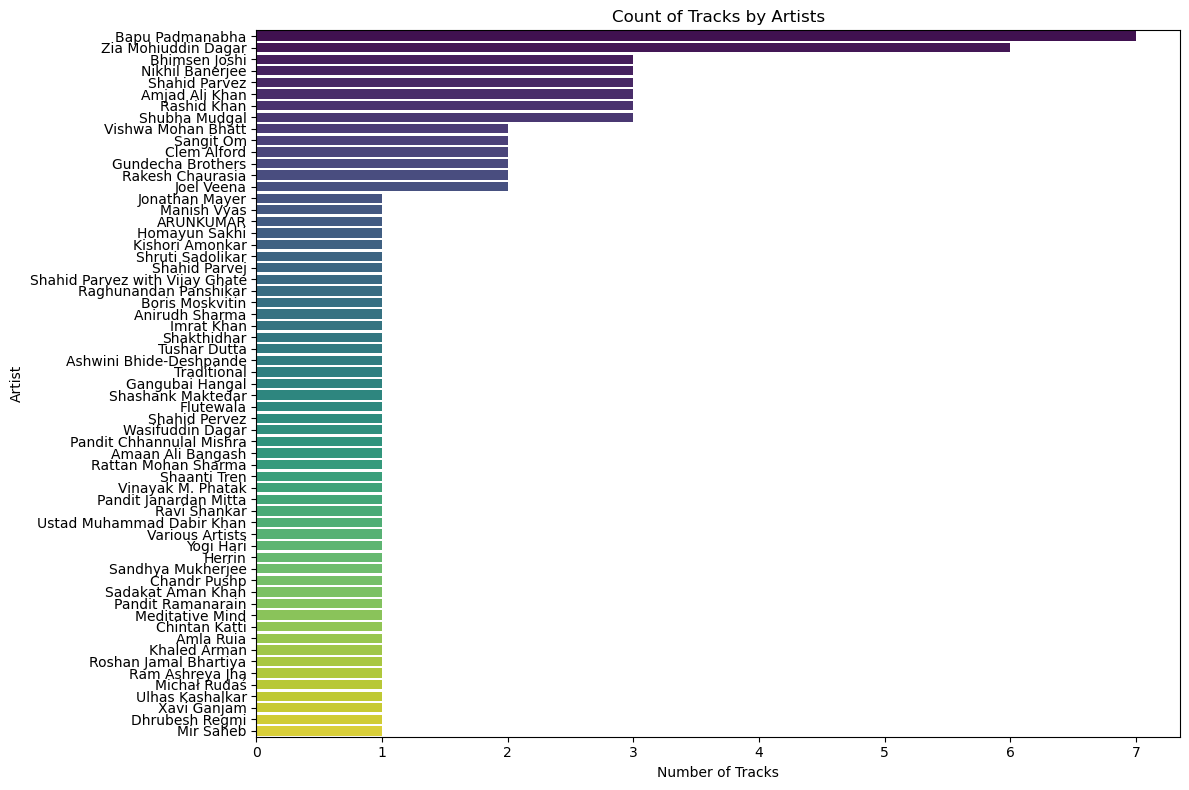


All audio files referenced in the DataFrame exist.


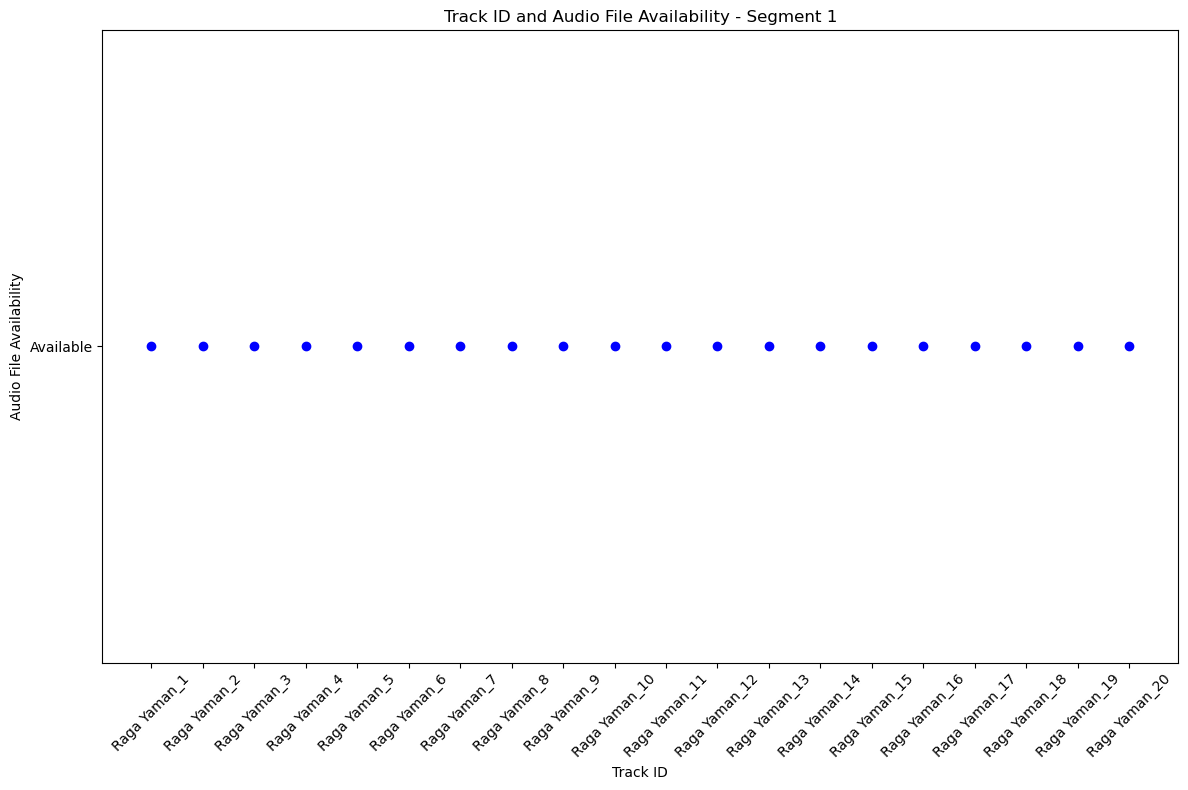

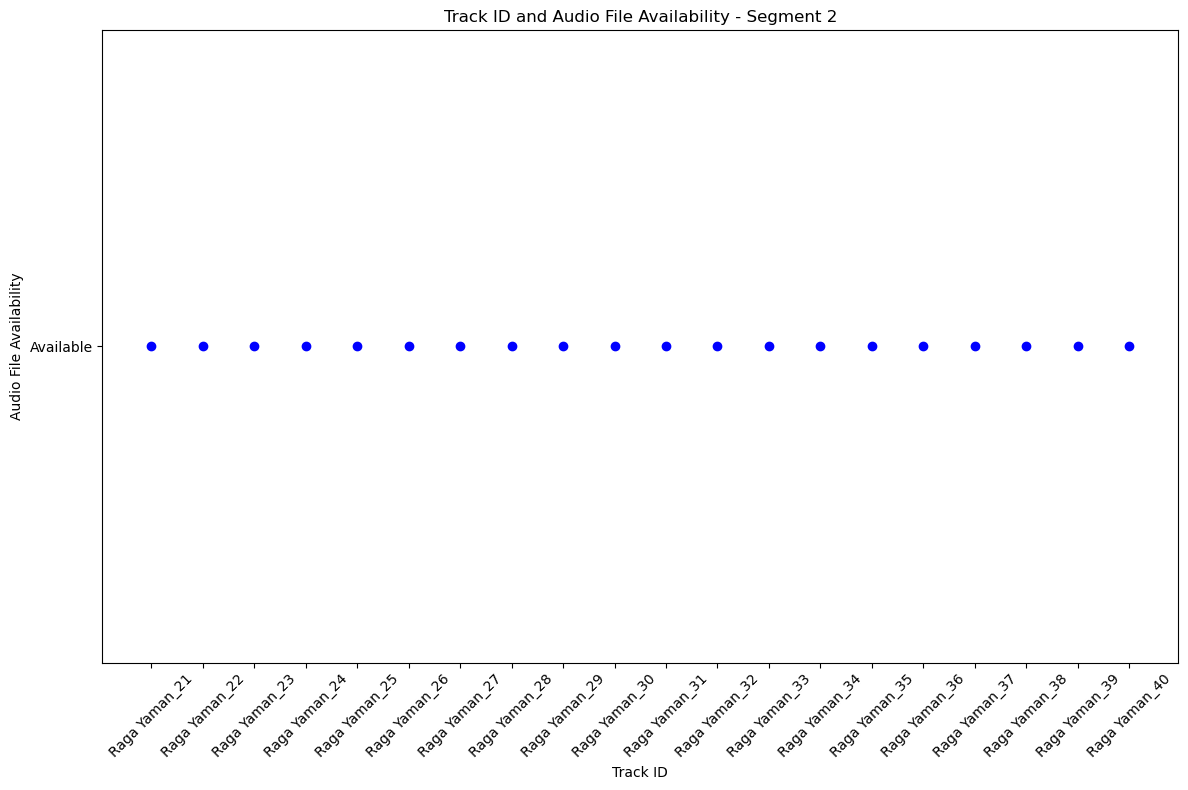

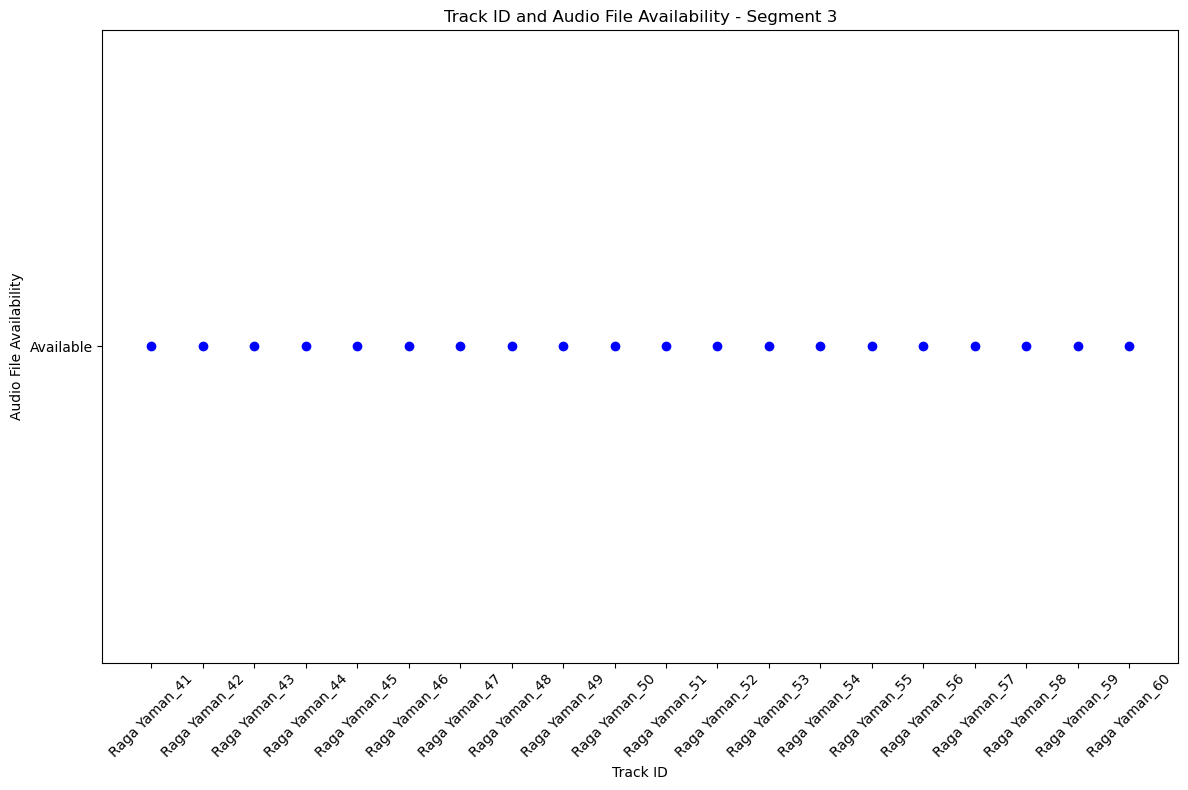

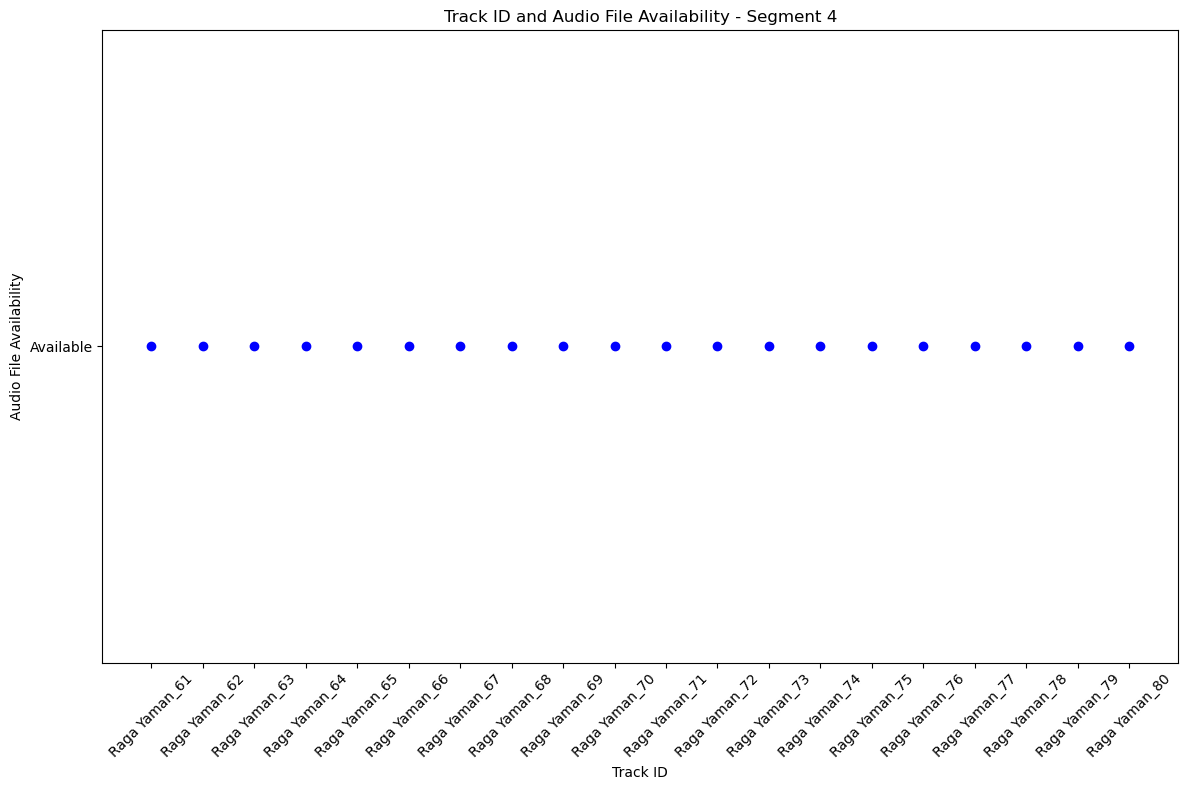

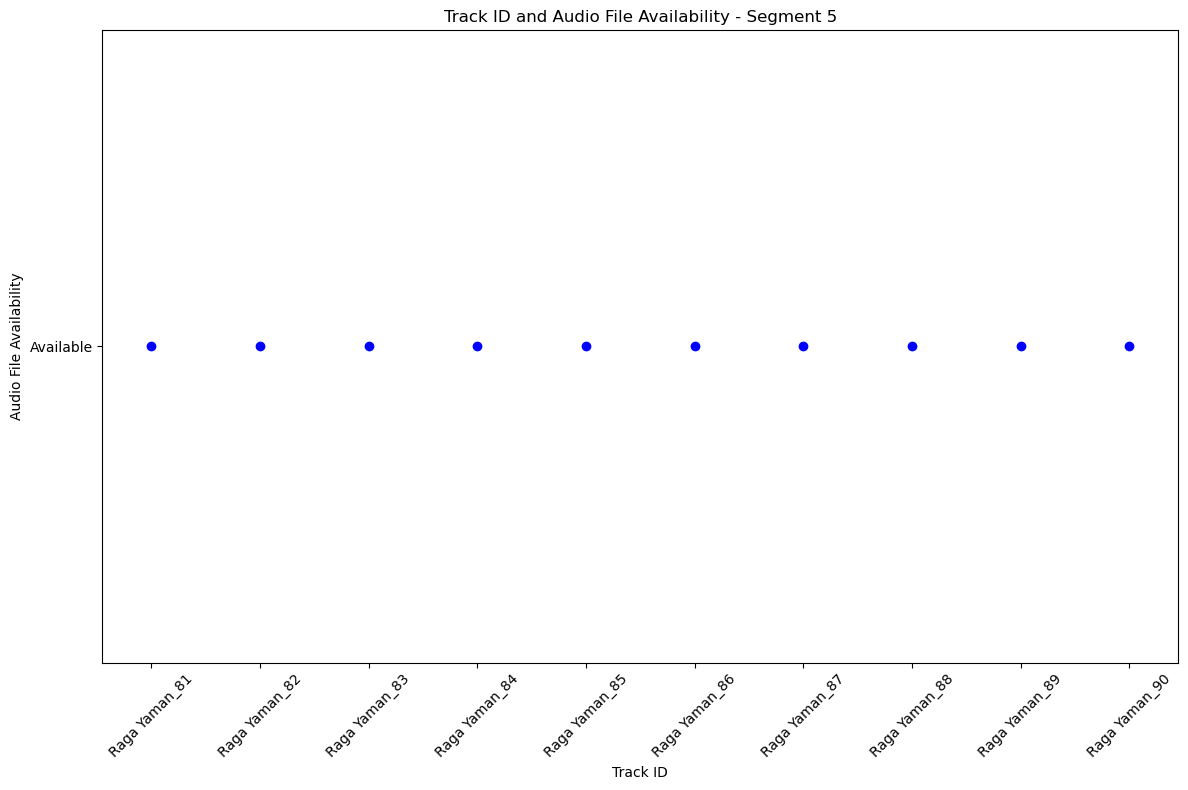

In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV data into a DataFrame
cleaned_csv_filename = 'cleaned_Raga Yaman_tracks.csv'
df = pd.read_csv(cleaned_csv_filename)

# Check DataFrame info
print("DataFrame Info:")
print(df.info())



# Visualization 2: Count of Tracks by Artists
plt.figure(figsize=(12, 8))
artist_counts = df['raga_artist'].value_counts().sort_values(ascending=False)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Count of Tracks by Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Verify and Visualize Audio File Availability
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)

# Visualization 3: Optional - Visualize Audio File Availability
if missing_audio_indices:
    print("\nMissing audio files visualization:")
    missing_df = df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['raga_artist'].value_counts().values, y=missing_df['raga_artist'].value_counts().index, palette='rocket')
    plt.title('Missing Audio Files by Artist')
    plt.xlabel('Number of Missing Files')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Additional Visualizations: Customize based on specific insights or patterns

def check_audio_files(df):
    audio_status = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if os.path.exists(audio_path):
            audio_status.append('Available')
        else:
            audio_status.append('Not Available')
    return audio_status

# Add audio_status column to DataFrame
df['audio_status'] = check_audio_files(df)

# Divide into segments of 20 entries each for visualization
num_segments = (len(df) // 20) + 1

for i in range(num_segments):
    start_idx = i * 20
    end_idx = min((i + 1) * 20, len(df))
    
    # Subset of DataFrame for current segment
    df_segment = df.iloc[start_idx:end_idx]
    
    # Visualization: Track ID and Audio File Availability
    plt.figure(figsize=(12, 8))
    plt.scatter(df_segment['raga_id'], df_segment['audio_status'], color='blue', marker='o')
    plt.title(f'Track ID and Audio File Availability - Segment {i+1}')
    plt.xlabel('Track ID')
    plt.ylabel('Audio File Availability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [39]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import pandas as pd
import datetime

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def extract_track_info(track, raga_name, index):
    duration_ms = track['duration_ms']
    duration = str(datetime.timedelta(milliseconds=duration_ms))
    
    # Construct raga_id as raga_name_index
    raga_id = f"{raga_name}_{index}"
    
    track_info = {
        'raga_id': raga_id,
        'raga_name': track['name'],
        'raga_artist': track['artists'][0]['name'],
        'raga_duration': duration,  # Format duration as hh:mm:ss
        'raga_audio_track': track['preview_url'],  # Preview URL for the track
        'raga_effect': None  # Placeholder for raga effect
    }
    return track_info

def download_track_audio(track_info):
    track_id = track_info['raga_id']
    track_name = track_info['raga_name']
    artist_name = track_info['raga_artist']

    audio_url = track_info['raga_audio_track']
    if audio_url:
        # Create directory to save audio files if it doesn't exist
        directory = f"audio/{artist_name}"
        audio_filename = f"{track_name}_{artist_name}.mp3"  # Initialize audio_filename here

        try:
            os.makedirs(directory, exist_ok=True)

            # Download the audio file
            audio_path = os.path.join(directory, audio_filename)
            with open(audio_path, 'wb') as f:
                f.write(requests.get(audio_url).content)
            print(f"Downloaded: {audio_filename}")
            return audio_path  # Return the path if download is successful
        except Exception as e:
            print(f"Error downloading {audio_filename}: {str(e)}")
    else:
        print(f"No preview URL available for track: {track_name} by {artist_name}. Skipping...")
    
    return None  # Return None if audio file download fails

def search_and_extract_raga_tracks(sp, raga_name, max_entries=90):
    limit = 50
    offset = 0
    all_tracks = []
    index = 1  # Initialize index for raga_id

    while len(all_tracks) < max_entries:
        results = sp.search(q=raga_name, type='track', limit=limit, offset=offset)['tracks']['items']
        if not results:
            break
        for track in results:
            # Check if the track's name exactly matches "Raga Ahir Bhairav"
            if raga_name.lower() in track['name'].lower():
                track_info = extract_track_info(track, raga_name, index)
                audio_path = download_track_audio(track_info)
                if audio_path:
                    all_tracks.append(track_info)
                    index += 1  # Increment index after processing a track
                if len(all_tracks) >= max_entries:
                    break
        offset += limit

    return pd.DataFrame(all_tracks)

# Example usage for Raga Ahir Bhairav
raga_name = "Raga Ahir Bhairav"
raga_tracks_df = search_and_extract_raga_tracks(sp, raga_name, max_entries=90)

# Remove entries with missing audio files
raga_tracks_df.dropna(subset=['raga_audio_track'], inplace=True)

# Save to CSV
csv_filename = f'{raga_name}_tracks.csv'
raga_tracks_df.to_csv(csv_filename, index=False)

# Display the DataFrame
print(raga_tracks_df.head())
print(f"Saved track information to {csv_filename}")


Error downloading Thank you Vishnu for Introducing me to Christ / Raga Ahir Bhairav_Mychael Danna.mp3: [Errno 2] No such file or directory: 'audio/Mychael Danna\\Thank you Vishnu for Introducing me to Christ / Raga Ahir Bhairav_Mychael Danna.mp3'
Downloaded: Raga Ahir Bhairav_Hariprasad Chaurasia.mp3
Downloaded: Raga Ahir Bhairav - Raga Ahir Bhairav - Madhyalaya Teen Taal_Sultan Khan.mp3
Downloaded: Raga Ahir Bhairav, Pt. 3_Brij Bhushan Kabra.mp3
Downloaded: Raga Ahir Bhairav_Shruti Sadolikar with Mangesh Mulye, Anant Kunte, Kiran Lele.mp3
Downloaded: Raga Ahir Bhairav_Kishori Amonkar.mp3
Downloaded: Raga Ahir Bhairav_Nikhil Banerjee.mp3
No preview URL available for track: Raga Ahir Bhairav - Remastered by Ravi Shankar. Skipping...
Downloaded: Raga Ahir Bhairav_Mahesh Kale.mp3
Downloaded: Raga Ahir Bhairav_Kishori Amonkar.mp3
Downloaded: Raga Ahir Bhairav_Rakesh Chaurasia.mp3
Downloaded: Raga Ahir Bhairav (Alap)_Joel Veena.mp3
Downloaded: Raga Ahir Bhairav_Shubhangi Sakhalkar.mp3
Downl

In [40]:
import pandas as pd
import os

# Load CSV file into a DataFrame
csv_filename = 'Raga Ahir Bhairav_tracks.csv'
df = pd.read_csv(csv_filename)

# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in DataFrame:")
print(missing_values)

# Step 3: Check for duplicate entries based on raga_id
duplicate_entries = df[df.duplicated(subset=['raga_id'], keep=False)]
if not duplicate_entries.empty:
    print("\nDuplicate entries based on raga_id:")
    print(duplicate_entries)
else:
    print("\nNo duplicate entries found based on raga_id.")

# Step 4: Verify existence of audio files
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)
if missing_audio_indices:
    print("\nMissing audio files:")
    print(df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']])
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Step 5: Handle any other inconsistencies or errors based on specific requirements

# Optionally, you can save the cleaned DataFrame back to CSV
cleaned_csv_filename = 'cleaned_Raga Ahir Bhairav_tracks.csv'
df.to_csv(cleaned_csv_filename, index=False)
print(f"\nCleaned track information saved to {cleaned_csv_filename}")


Missing values in DataFrame:
raga_id              0
raga_name            0
raga_artist          0
raga_duration        0
raga_audio_track     0
raga_effect         90
dtype: int64

No duplicate entries found based on raga_id.

All audio files referenced in the DataFrame exist.

Cleaned track information saved to cleaned_Raga Ahir Bhairav_tracks.csv


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   raga_id           90 non-null     object 
 1   raga_name         90 non-null     object 
 2   raga_artist       90 non-null     object 
 3   raga_duration     90 non-null     object 
 4   raga_audio_track  90 non-null     object 
 5   raga_effect       0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 4.3+ KB
None


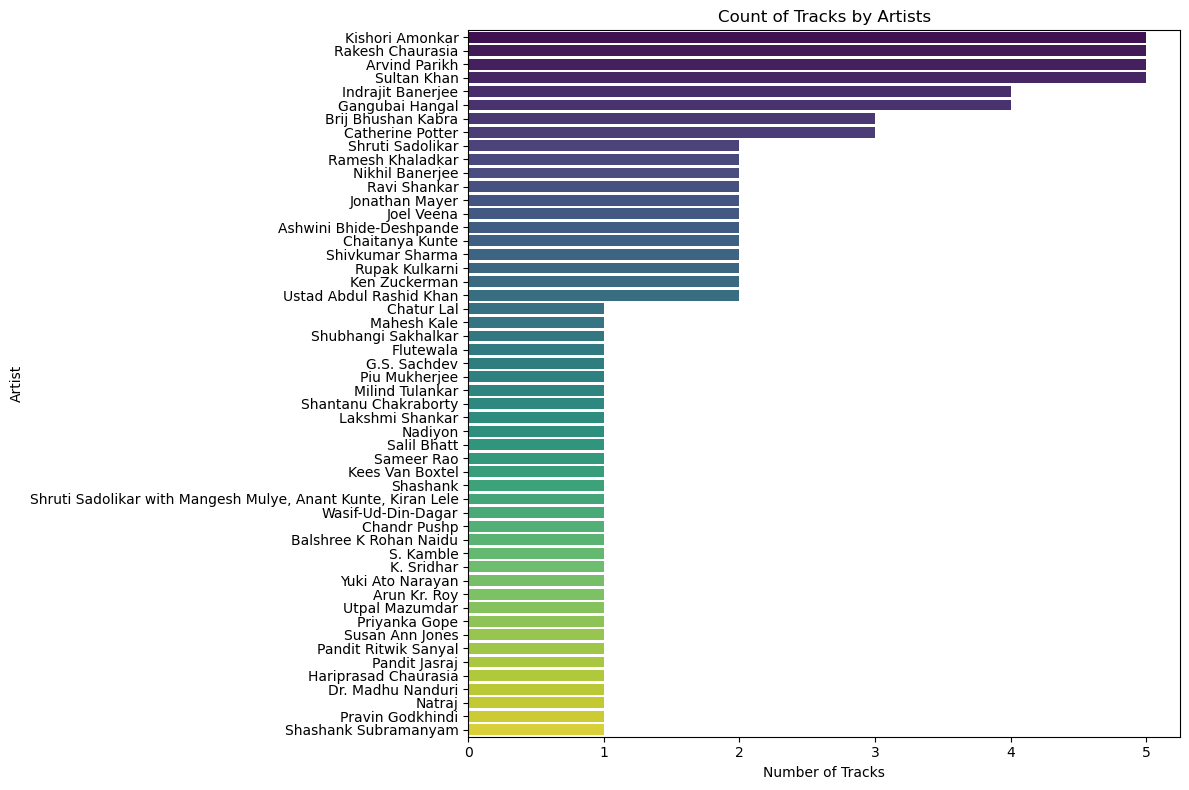


All audio files referenced in the DataFrame exist.


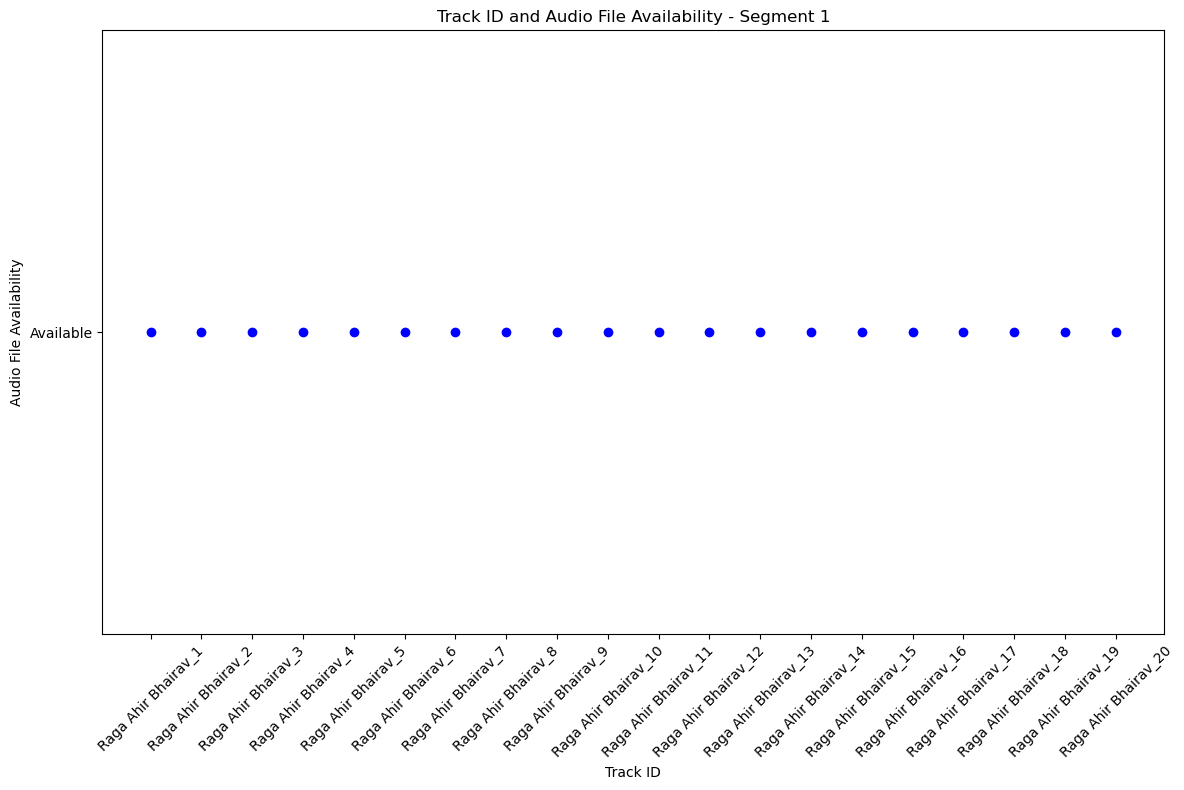

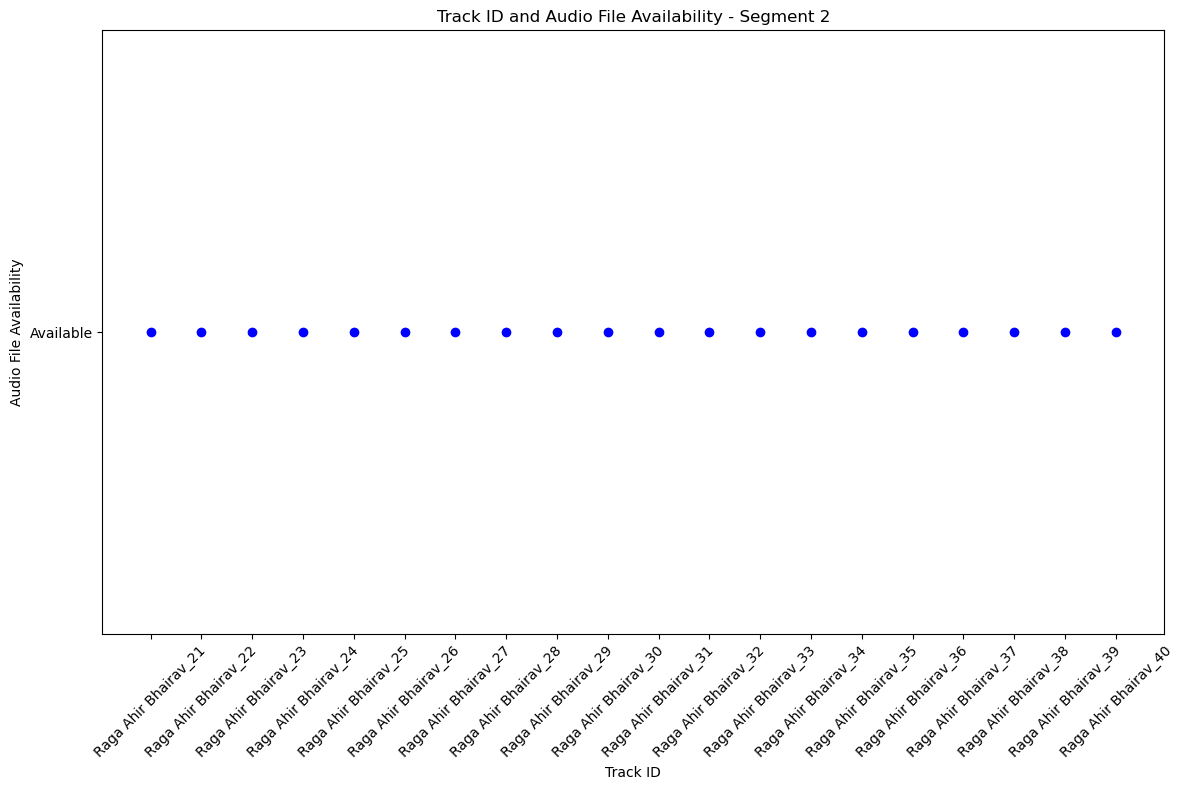

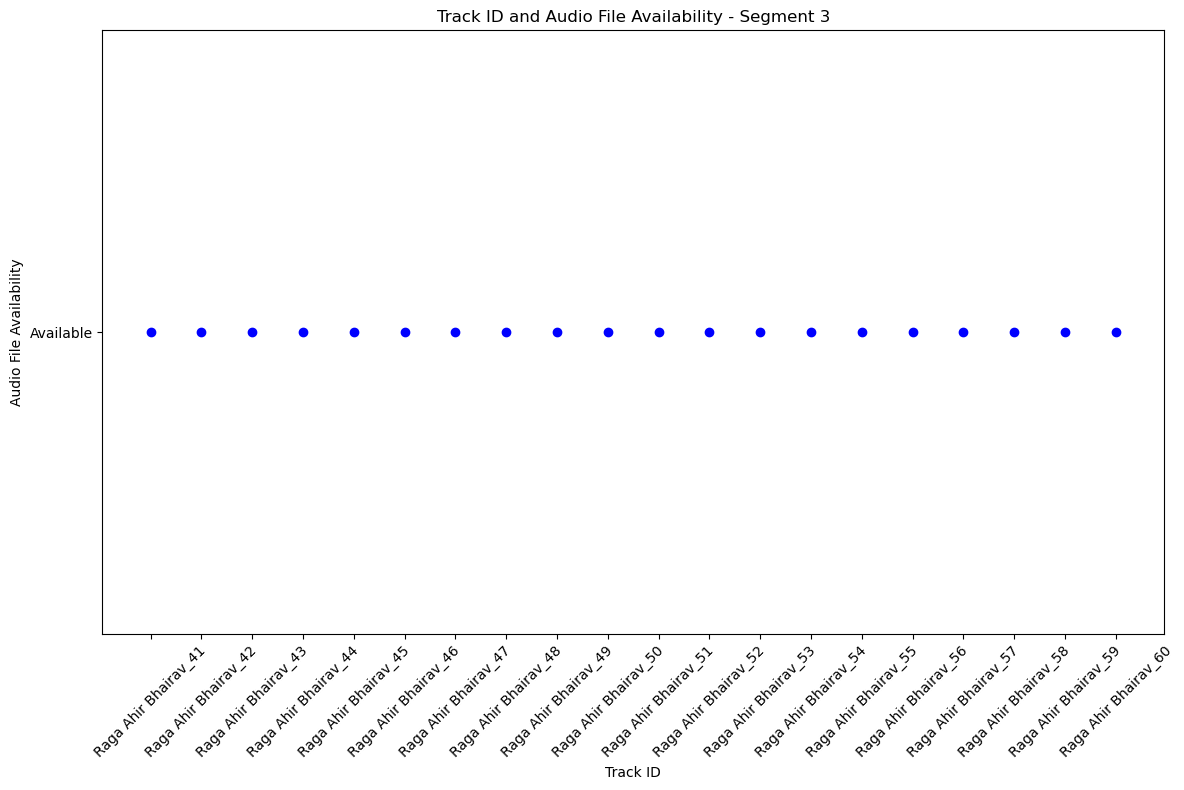

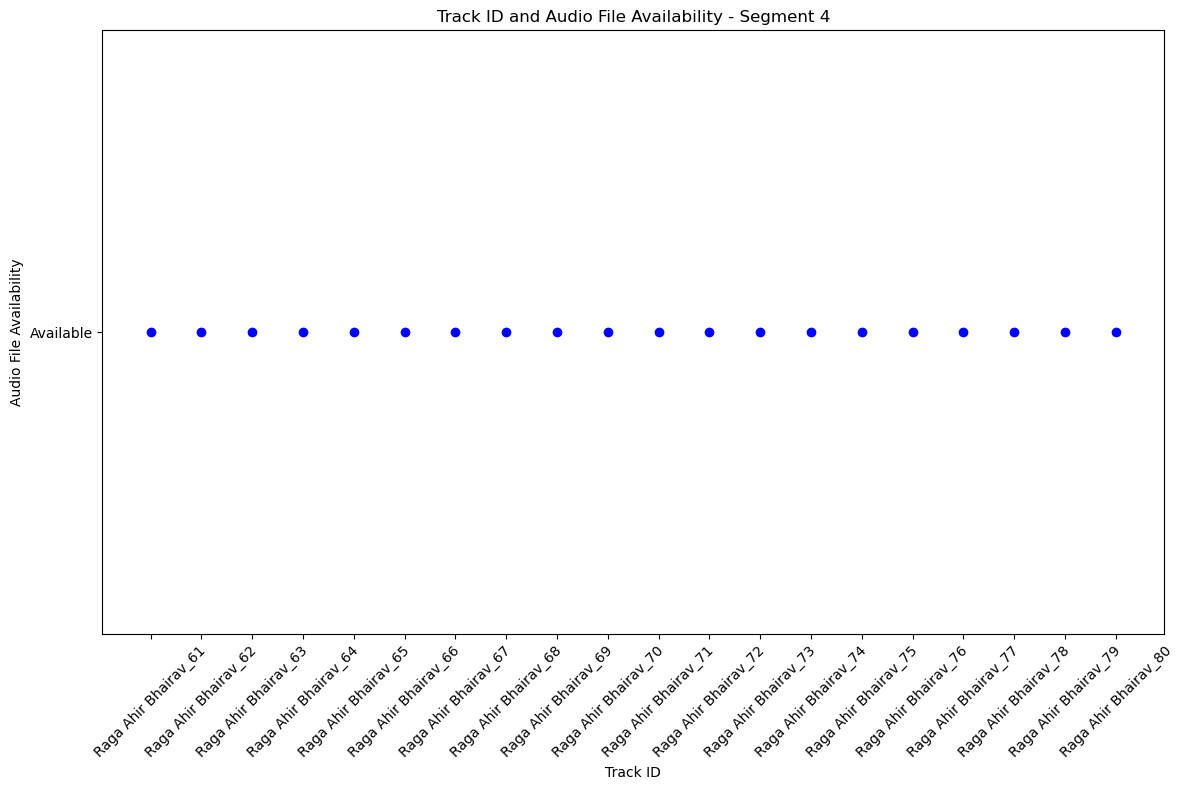

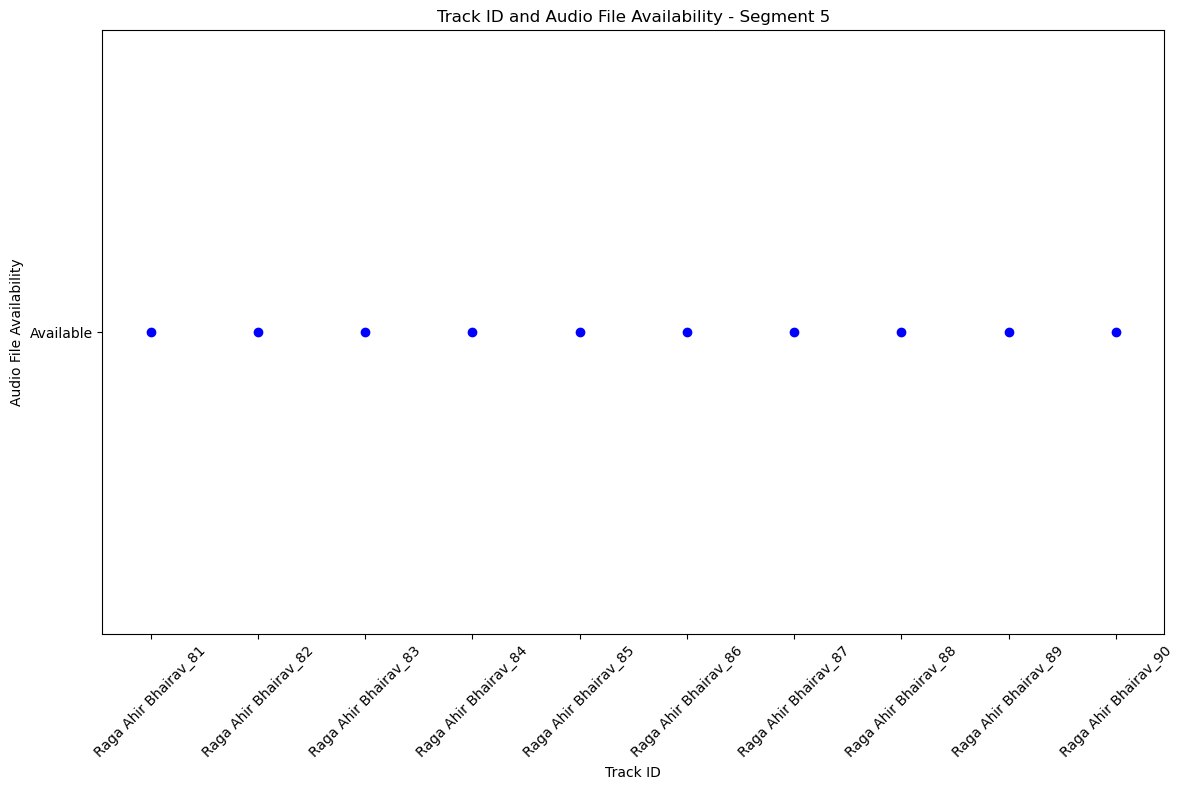

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV data into a DataFrame
cleaned_csv_filename = 'cleaned_Raga Ahir Bhairav_tracks.csv'
df = pd.read_csv(cleaned_csv_filename)

# Check DataFrame info
print("DataFrame Info:")
print(df.info())



# Visualization 2: Count of Tracks by Artists
plt.figure(figsize=(12, 8))
artist_counts = df['raga_artist'].value_counts().sort_values(ascending=False)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Count of Tracks by Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Verify and Visualize Audio File Availability
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)

# Visualization 3: Optional - Visualize Audio File Availability
if missing_audio_indices:
    print("\nMissing audio files visualization:")
    missing_df = df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['raga_artist'].value_counts().values, y=missing_df['raga_artist'].value_counts().index, palette='rocket')
    plt.title('Missing Audio Files by Artist')
    plt.xlabel('Number of Missing Files')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Additional Visualizations: Customize based on specific insights or patterns

def check_audio_files(df):
    audio_status = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if os.path.exists(audio_path):
            audio_status.append('Available')
        else:
            audio_status.append('Not Available')
    return audio_status

# Add audio_status column to DataFrame
df['audio_status'] = check_audio_files(df)

# Divide into segments of 20 entries each for visualization
num_segments = (len(df) // 20) + 1

for i in range(num_segments):
    start_idx = i * 20
    end_idx = min((i + 1) * 20, len(df))
    
    # Subset of DataFrame for current segment
    df_segment = df.iloc[start_idx:end_idx]
    
    # Visualization: Track ID and Audio File Availability
    plt.figure(figsize=(12, 8))
    plt.scatter(df_segment['raga_id'], df_segment['audio_status'], color='blue', marker='o')
    plt.title(f'Track ID and Audio File Availability - Segment {i+1}')
    plt.xlabel('Track ID')
    plt.ylabel('Audio File Availability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [43]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import pandas as pd
import datetime

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def extract_track_info(track, raga_name, index):
    duration_ms = track['duration_ms']
    duration = str(datetime.timedelta(milliseconds=duration_ms))
    
    # Construct raga_id as raga_name_index
    raga_id = f"{raga_name}_{index}"
    
    track_info = {
        'raga_id': raga_id,
        'raga_name': track['name'],
        'raga_artist': track['artists'][0]['name'],
        'raga_duration': duration,  # Format duration as hh:mm:ss
        'raga_audio_track': track['preview_url'],  # Preview URL for the track
        'raga_effect': None  # Placeholder for raga effect
    }
    return track_info

def download_track_audio(track_info):
    track_id = track_info['raga_id']
    track_name = track_info['raga_name']
    artist_name = track_info['raga_artist']

    audio_url = track_info['raga_audio_track']
    if audio_url:
        # Create directory to save audio files if it doesn't exist
        directory = f"audio/{artist_name}"
        audio_filename = f"{track_name}_{artist_name}.mp3"  # Initialize audio_filename here

        try:
            os.makedirs(directory, exist_ok=True)

            # Download the audio file
            audio_path = os.path.join(directory, audio_filename)
            with open(audio_path, 'wb') as f:
                f.write(requests.get(audio_url).content)
            print(f"Downloaded: {audio_filename}")
            return audio_path  # Return the path if download is successful
        except Exception as e:
            print(f"Error downloading {audio_filename}: {str(e)}")
    else:
        print(f"No preview URL available for track: {track_name} by {artist_name}. Skipping...")
    
    return None  # Return None if audio file download fails

def search_and_extract_raga_tracks(sp, raga_name, max_entries=90):
    limit = 50
    offset = 0
    all_tracks = []
    index = 1  # Initialize index for raga_id

    while len(all_tracks) < max_entries:
        results = sp.search(q=raga_name, type='track', limit=limit, offset=offset)['tracks']['items']
        if not results:
            break
        for track in results:
            # Check if the track's name exactly matches the specified raga_name
            if raga_name.lower() in track['name'].lower():
                track_info = extract_track_info(track, raga_name, index)
                audio_path = download_track_audio(track_info)
                if audio_path:
                    all_tracks.append(track_info)
                    index += 1  # Increment index after processing a track
                if len(all_tracks) >= max_entries:
                    break
        offset += limit

    return pd.DataFrame(all_tracks)

# Example usage for Raga Asavari
raga_name = "Asavari"
raga_tracks_df = search_and_extract_raga_tracks(sp, raga_name, max_entries=90)

# Remove entries with missing audio files
raga_tracks_df.dropna(subset=['raga_audio_track'], inplace=True)

# Save to CSV
csv_filename = f'{raga_name}_tracks.csv'
raga_tracks_df.to_csv(csv_filename, index=False)

# Display the DataFrame
print(raga_tracks_df.head())
print(f"Saved track information to {csv_filename}")


Downloaded: Asavari_Hariprasad Chaurasia.mp3
Downloaded: Asavari_Multani.mp3
Downloaded: Hanuman Chalisa in Raag Asavari_Sudeepto Chakraborty.mp3
Downloaded: Asavari_Michael E.mp3
Downloaded: Asavari_Hindi Lounge.mp3
Downloaded: Komal Rishabh Asavari - Jhaptaal_Nayan Ghosh.mp3
Downloaded: Asavari_Indian Yoga Music.mp3
Downloaded: Based on Raga Komal Rishabh Asavari_Rupak Kulkarni.mp3
Downloaded: Asavari_Michael E.mp3
Downloaded: Asavari_Zen Indian Chill.mp3
Downloaded: Asavari_Indian Beats Project.mp3
Downloaded: Asavari_Zen Indian Chill.mp3
Downloaded: Raag Asavari_Harlove Singh.mp3
Downloaded: Asavari_Charu Suri.mp3
Downloaded: Raga Asavari_Bhimsen Joshi.mp3
Downloaded: Asavari_Charu Suri.mp3
Downloaded: Raaga Asavari_Pandit Pran Nath.mp3
Downloaded: Asavari_Indian Beats Project.mp3
Downloaded: Raga Asavari Todi_Bhimsen Joshi.mp3
Downloaded: Asavari_Zen Indian Chill.mp3
Downloaded: Raag Asavari Sudhang_Harlove Singh.mp3
Downloaded: Asavari_Indian Yoga Music.mp3
Downloaded: Simran - R

In [44]:
import pandas as pd
import os

# Load CSV file into a DataFrame
csv_filename = 'Asavari_tracks.csv'
df = pd.read_csv(csv_filename)

# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in DataFrame:")
print(missing_values)

# Step 3: Check for duplicate entries based on raga_id
duplicate_entries = df[df.duplicated(subset=['raga_id'], keep=False)]
if not duplicate_entries.empty:
    print("\nDuplicate entries based on raga_id:")
    print(duplicate_entries)
else:
    print("\nNo duplicate entries found based on raga_id.")

# Step 4: Verify existence of audio files
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)
if missing_audio_indices:
    print("\nMissing audio files:")
    print(df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']])
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Step 5: Handle any other inconsistencies or errors based on specific requirements

# Optionally, you can save the cleaned DataFrame back to CSV
cleaned_csv_filename = 'cleaned_Asavari_tracks.csv'
df.to_csv(cleaned_csv_filename, index=False)
print(f"\nCleaned track information saved to {cleaned_csv_filename}")


Missing values in DataFrame:
raga_id              0
raga_name            0
raga_artist          0
raga_duration        0
raga_audio_track     0
raga_effect         90
dtype: int64

No duplicate entries found based on raga_id.

All audio files referenced in the DataFrame exist.

Cleaned track information saved to cleaned_Asavari_tracks.csv


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   raga_id           90 non-null     object 
 1   raga_name         90 non-null     object 
 2   raga_artist       90 non-null     object 
 3   raga_duration     90 non-null     object 
 4   raga_audio_track  90 non-null     object 
 5   raga_effect       0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 4.3+ KB
None


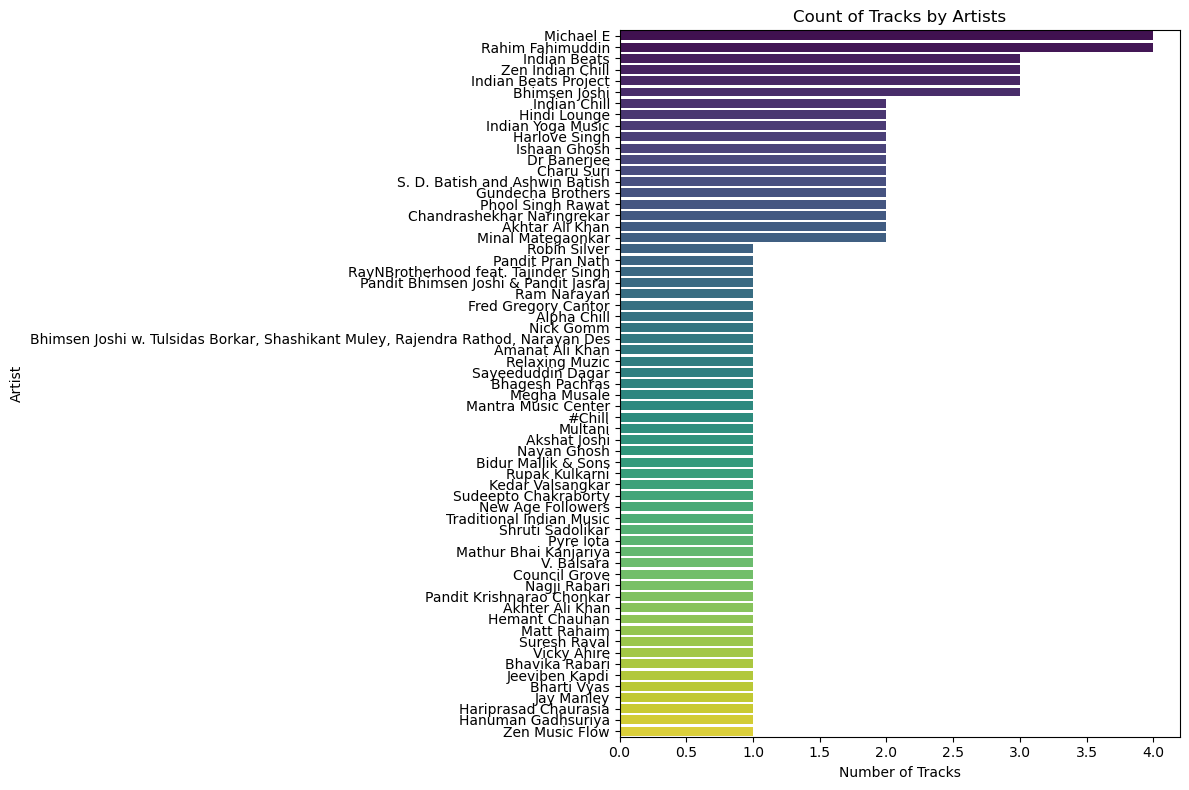


All audio files referenced in the DataFrame exist.


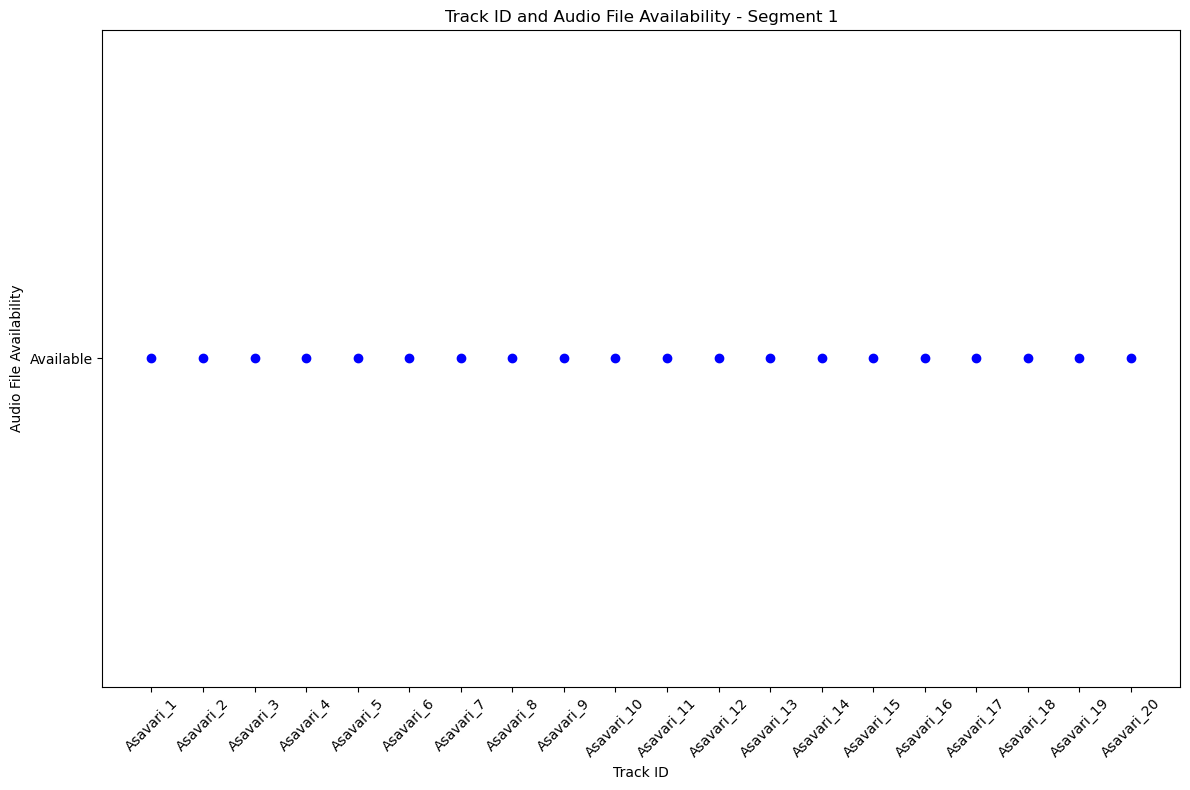

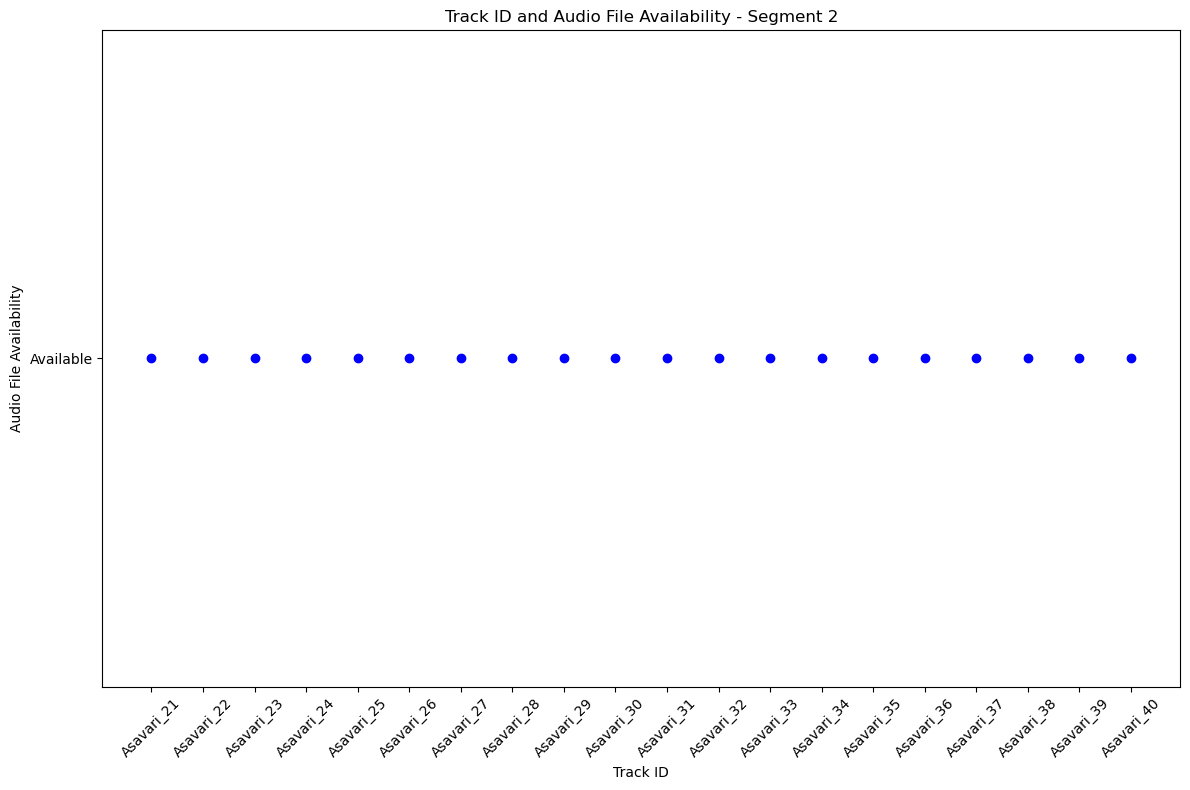

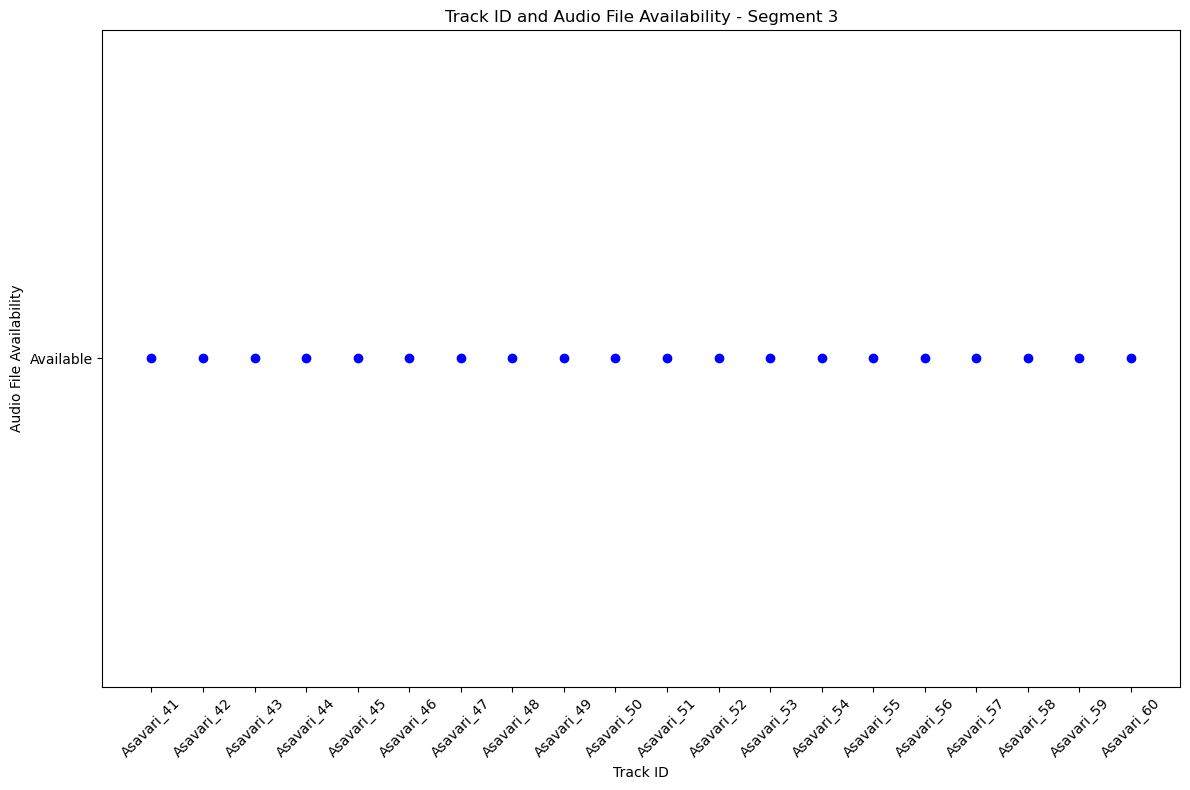

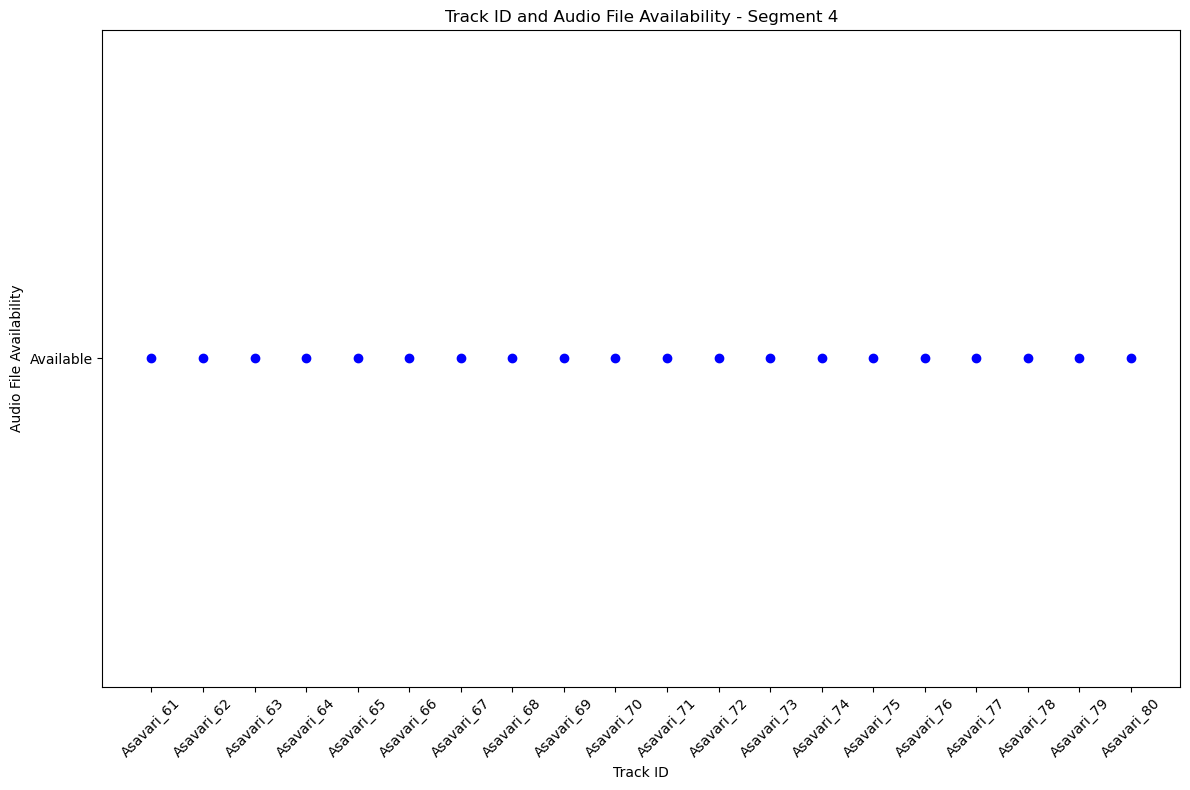

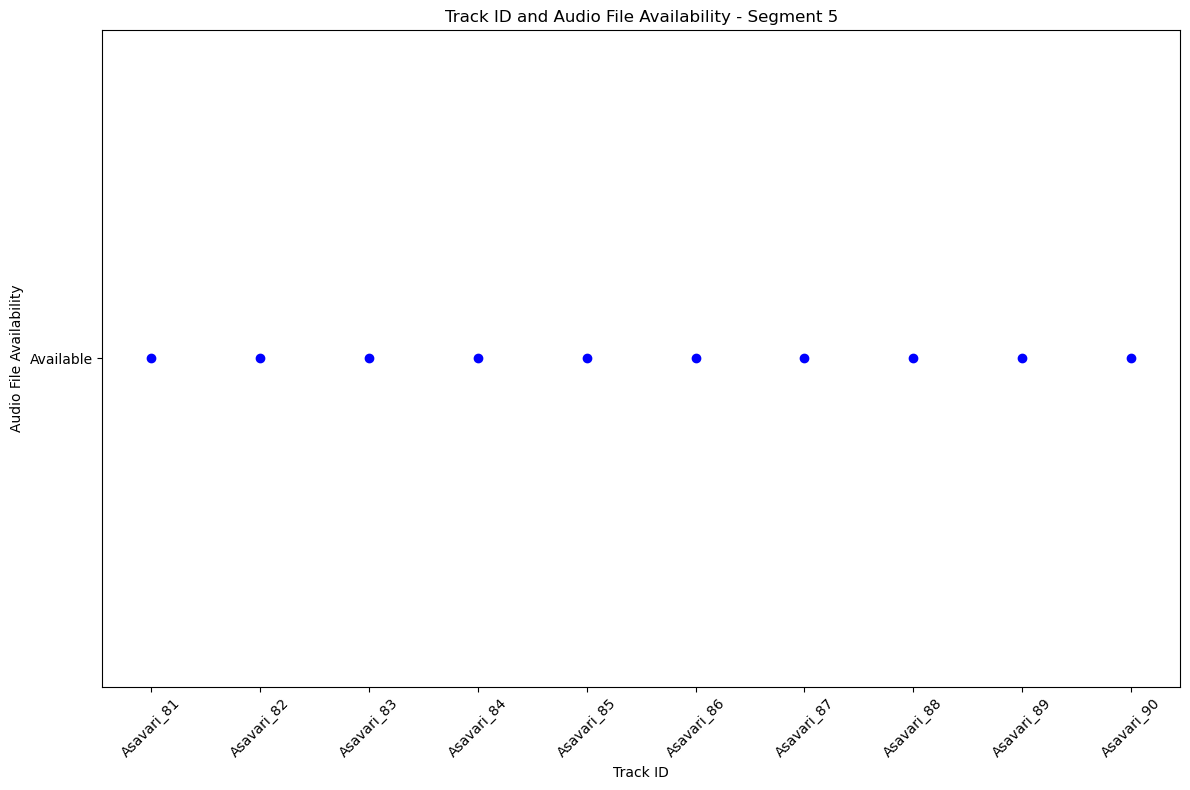

In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV data into a DataFrame
cleaned_csv_filename = 'cleaned_Asavari_tracks.csv'
df = pd.read_csv(cleaned_csv_filename)

# Check DataFrame info
print("DataFrame Info:")
print(df.info())



# Visualization 2: Count of Tracks by Artists
plt.figure(figsize=(12, 8))
artist_counts = df['raga_artist'].value_counts().sort_values(ascending=False)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Count of Tracks by Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Verify and Visualize Audio File Availability
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)

# Visualization 3: Optional - Visualize Audio File Availability
if missing_audio_indices:
    print("\nMissing audio files visualization:")
    missing_df = df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['raga_artist'].value_counts().values, y=missing_df['raga_artist'].value_counts().index, palette='rocket')
    plt.title('Missing Audio Files by Artist')
    plt.xlabel('Number of Missing Files')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Additional Visualizations: Customize based on specific insights or patterns

def check_audio_files(df):
    audio_status = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if os.path.exists(audio_path):
            audio_status.append('Available')
        else:
            audio_status.append('Not Available')
    return audio_status

# Add audio_status column to DataFrame
df['audio_status'] = check_audio_files(df)

# Divide into segments of 20 entries each for visualization
num_segments = (len(df) // 20) + 1

for i in range(num_segments):
    start_idx = i * 20
    end_idx = min((i + 1) * 20, len(df))
    
    # Subset of DataFrame for current segment
    df_segment = df.iloc[start_idx:end_idx]
    
    # Visualization: Track ID and Audio File Availability
    plt.figure(figsize=(12, 8))
    plt.scatter(df_segment['raga_id'], df_segment['audio_status'], color='blue', marker='o')
    plt.title(f'Track ID and Audio File Availability - Segment {i+1}')
    plt.xlabel('Track ID')
    plt.ylabel('Audio File Availability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [46]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import pandas as pd
import datetime

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def extract_track_info(track, raga_name, index):
    duration_ms = track['duration_ms']
    duration = str(datetime.timedelta(milliseconds=duration_ms))
    
    # Construct raga_id as raga_name_index
    raga_id = f"{raga_name}_{index}"
    
    track_info = {
        'raga_id': raga_id,
        'raga_name': track['name'],
        'raga_artist': track['artists'][0]['name'],
        'raga_duration': duration,  # Format duration as hh:mm:ss
        'raga_audio_track': track['preview_url'],  # Preview URL for the track
        'raga_effect': None  # Placeholder for raga effect
    }
    return track_info

def download_track_audio(track_info):
    track_id = track_info['raga_id']
    track_name = track_info['raga_name']
    artist_name = track_info['raga_artist']

    audio_url = track_info['raga_audio_track']
    if audio_url:
        # Create directory to save audio files if it doesn't exist
        directory = f"audio/{artist_name}"
        audio_filename = f"{track_name}_{artist_name}.mp3"  # Initialize audio_filename here

        try:
            os.makedirs(directory, exist_ok=True)

            # Download the audio file
            audio_path = os.path.join(directory, audio_filename)
            with open(audio_path, 'wb') as f:
                f.write(requests.get(audio_url).content)
            print(f"Downloaded: {audio_filename}")
            return audio_path  # Return the path if download is successful
        except Exception as e:
            print(f"Error downloading {audio_filename}: {str(e)}")
    else:
        print(f"No preview URL available for track: {track_name} by {artist_name}. Skipping...")
    
    return None  # Return None if audio file download fails

def search_and_extract_raga_tracks(sp, raga_name, max_entries=90):
    limit = 50
    offset = 0
    all_tracks = []
    index = 1  # Initialize index for raga_id

    while len(all_tracks) < max_entries:
        results = sp.search(q=raga_name, type='track', limit=limit, offset=offset)['tracks']['items']
        if not results:
            break
        for track in results:
            # Check if the track's name exactly matches the specified raga_name
            if raga_name.lower() in track['name'].lower():
                track_info = extract_track_info(track, raga_name, index)
                audio_path = download_track_audio(track_info)
                if audio_path:
                    all_tracks.append(track_info)
                    index += 1  # Increment index after processing a track
                if len(all_tracks) >= max_entries:
                    break
        offset += limit

    return pd.DataFrame(all_tracks)

# Example usage for Raga Bageshri
raga_name = "Raga Bageshri"
raga_tracks_df = search_and_extract_raga_tracks(sp, raga_name, max_entries=90)

# Remove entries with missing audio files (if any)
raga_tracks_df.dropna(subset=['raga_audio_track'], inplace=True)

# Save to CSV
csv_filename = f'{raga_name}_tracks.csv'
raga_tracks_df.to_csv(csv_filename, index=False)

# Display the DataFrame
print(raga_tracks_df.head())
print(f"Saved track information to {csv_filename}")


Downloaded: Raga Bageshri_Shaant Man.mp3
Downloaded: Awakening (based on Raga Bageshri)_Mark Seelig.mp3
Downloaded: Midnight Stillness - Raga Bageshri_Hariprasad Chaurasia.mp3
Downloaded: Raga Bageshri -Vilambit Gat In Roopak Tala_Shivkumar Sharma.mp3
Downloaded: Raga Bageshri_Ronu Majumdar.mp3
Downloaded: Raga Bageshri_Nityanand Haldipur.mp3
Downloaded: Raga Bageshri_Krishnamurti Sridhar.mp3
Downloaded: Raga Bageshri_G.S. Sachdev.mp3
Downloaded: Raga Bageshri (feat. Keerthan Holla, Madhusoodan Bhat, Kaushik Bhat)_Traditional.mp3
Downloaded: Raga Bageshri - Jor_Hariprasad Chaurasia.mp3
Downloaded: Raga Bageshri - Alap_Hariprasad Chaurasia.mp3
Downloaded: Raga Bageshri - Raga Bageshri - Teentaal_Pandit Jasraj.mp3
Downloaded: Raga Bageshri (Alap)_Vishwa Mohan Bhatt.mp3
Downloaded: Raga Bageshri - Gat in Rupak Taa_Hariprasad Chaurasia.mp3
Downloaded: Raga Bageshri - Gat In Rupak Tal_Hariprasad Chaurasia.mp3
Downloaded: Raga Bageshri Kanara - Alap, Jor, Jhala_Steve Oda.mp3
Error downloadin

In [47]:
import pandas as pd
import os

# Load CSV file into a DataFrame
csv_filename = 'Raga Bageshri_tracks.csv'
df = pd.read_csv(csv_filename)

# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in DataFrame:")
print(missing_values)

# Step 3: Check for duplicate entries based on raga_id
duplicate_entries = df[df.duplicated(subset=['raga_id'], keep=False)]
if not duplicate_entries.empty:
    print("\nDuplicate entries based on raga_id:")
    print(duplicate_entries)
else:
    print("\nNo duplicate entries found based on raga_id.")

# Step 4: Verify existence of audio files
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)
if missing_audio_indices:
    print("\nMissing audio files:")
    print(df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']])
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Step 5: Handle any other inconsistencies or errors based on specific requirements

# Optionally, you can save the cleaned DataFrame back to CSV
cleaned_csv_filename = 'cleaned_Raga Bageshri_tracks.csv'
df.to_csv(cleaned_csv_filename, index=False)
print(f"\nCleaned track information saved to {cleaned_csv_filename}")


Missing values in DataFrame:
raga_id              0
raga_name            0
raga_artist          0
raga_duration        0
raga_audio_track     0
raga_effect         90
dtype: int64

No duplicate entries found based on raga_id.

All audio files referenced in the DataFrame exist.

Cleaned track information saved to cleaned_Raga Bageshri_tracks.csv


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   raga_id           90 non-null     object 
 1   raga_name         90 non-null     object 
 2   raga_artist       90 non-null     object 
 3   raga_duration     90 non-null     object 
 4   raga_audio_track  90 non-null     object 
 5   raga_effect       0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 4.3+ KB
None


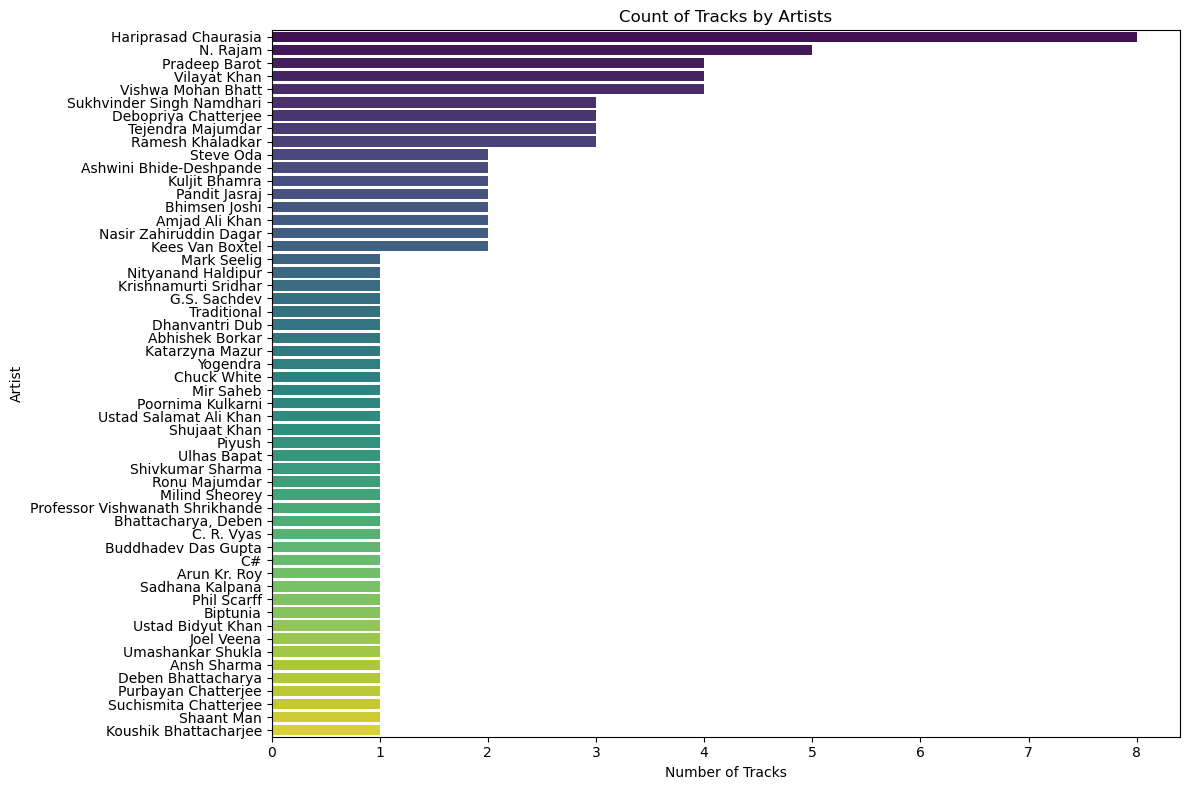


All audio files referenced in the DataFrame exist.


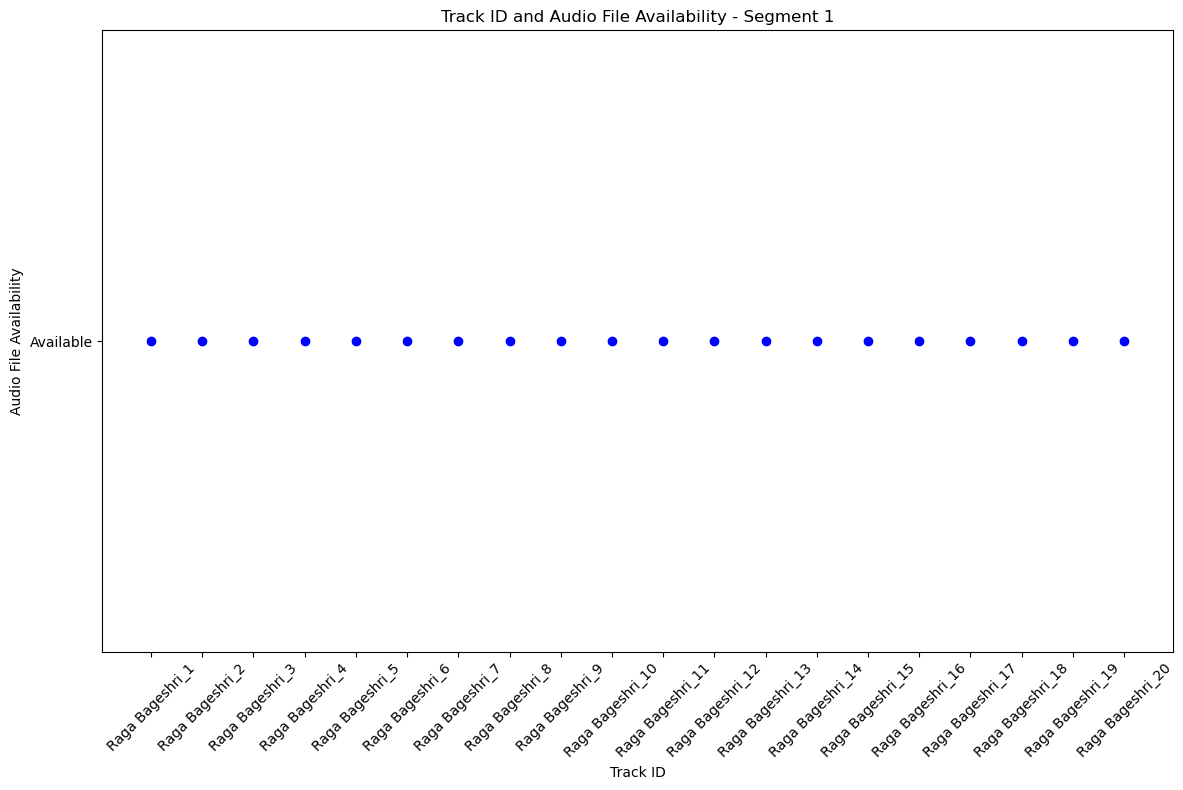

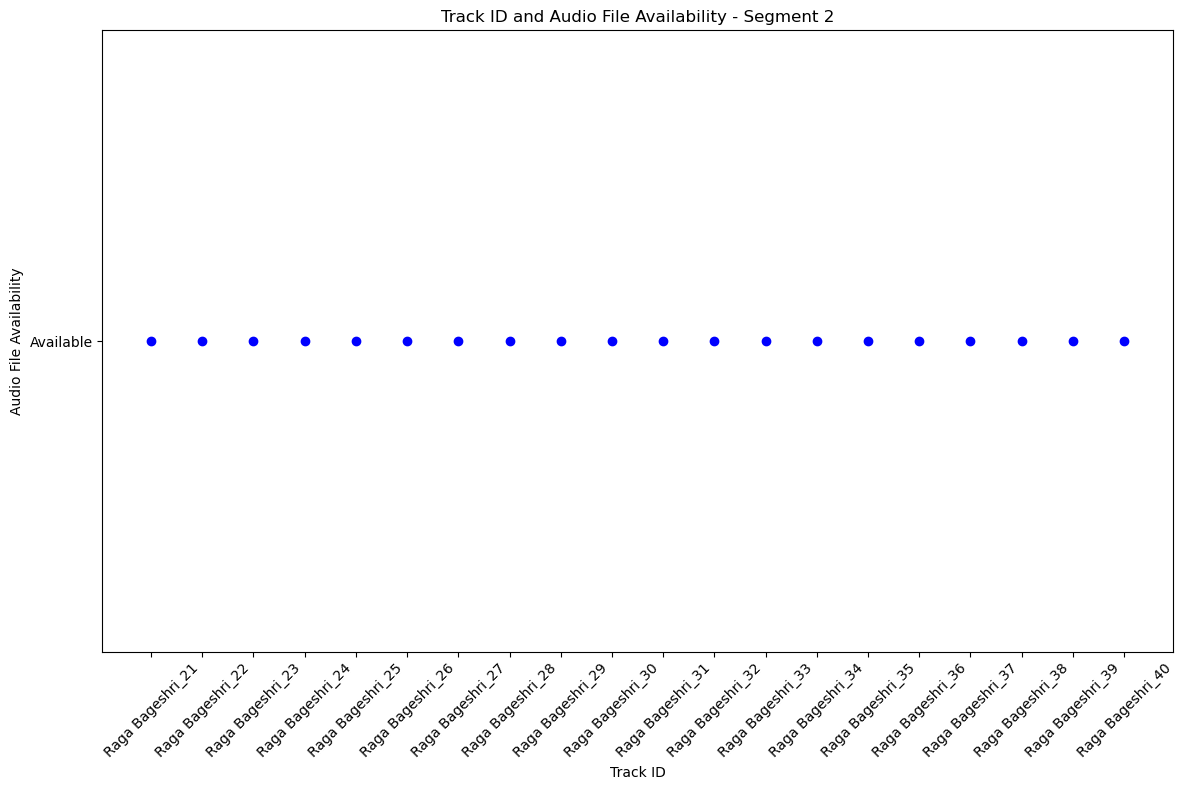

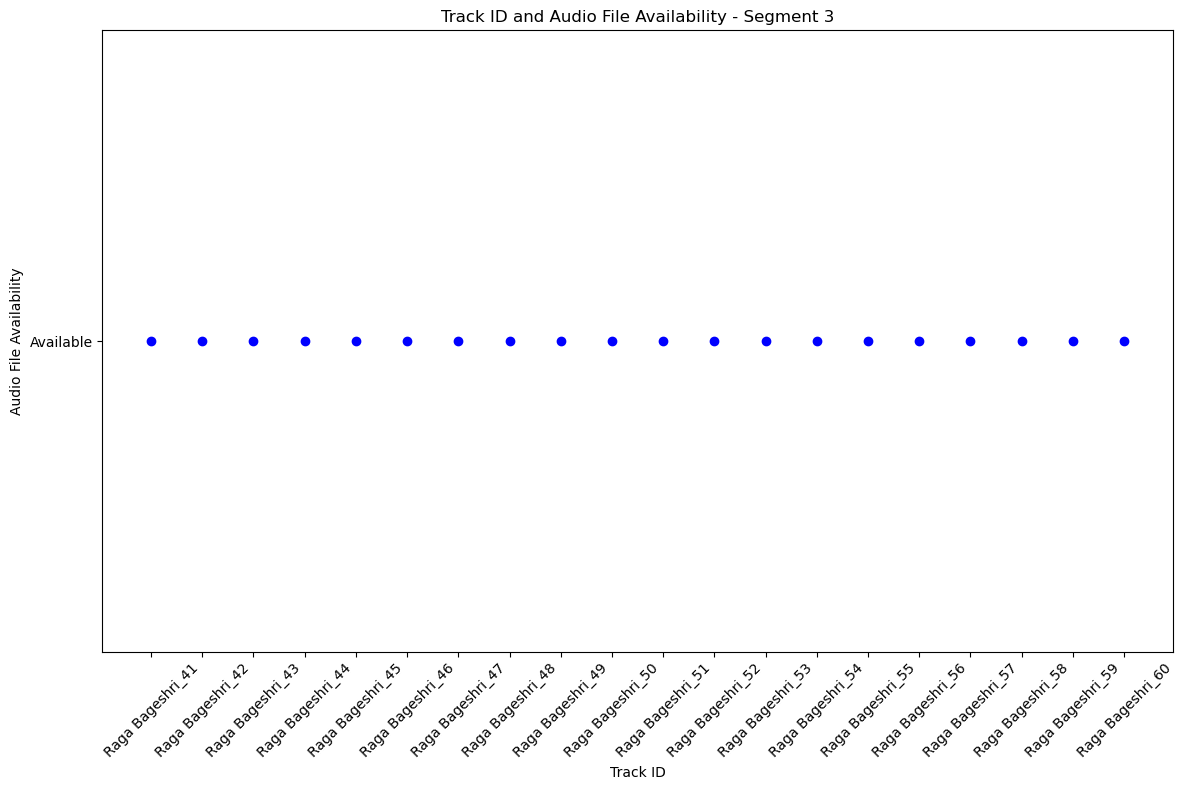

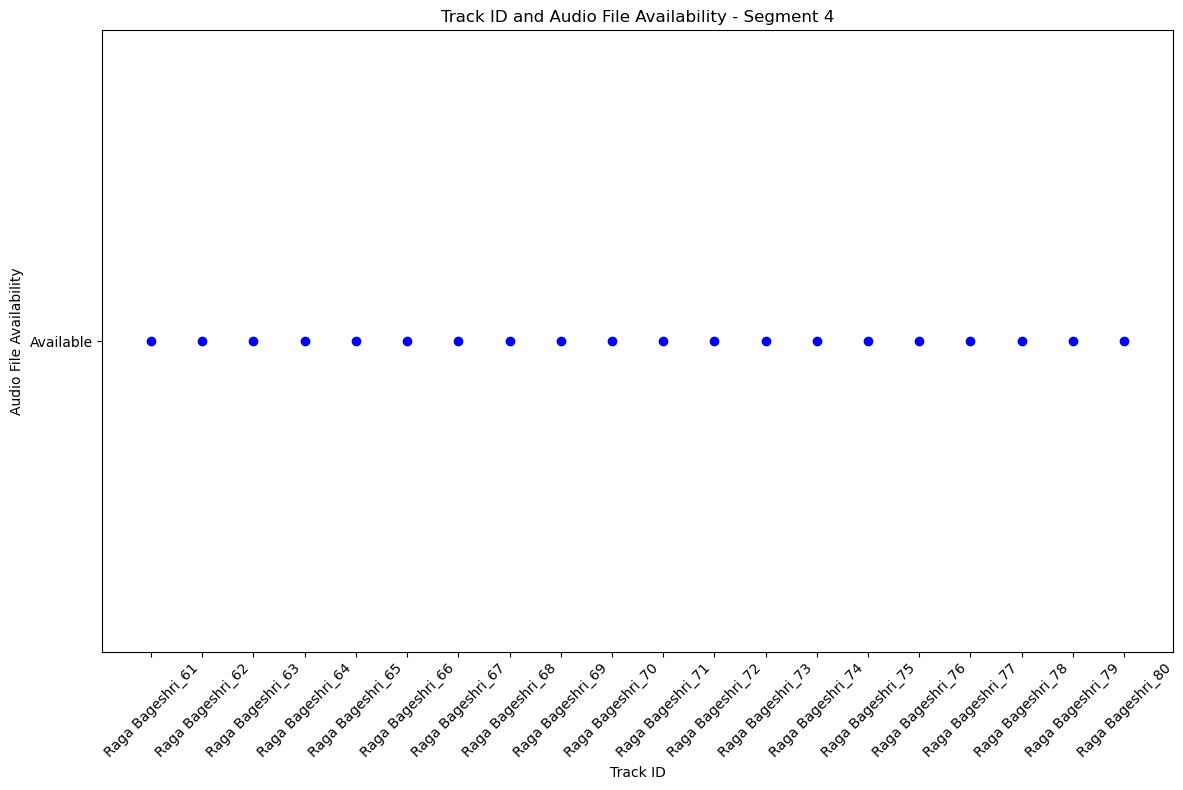

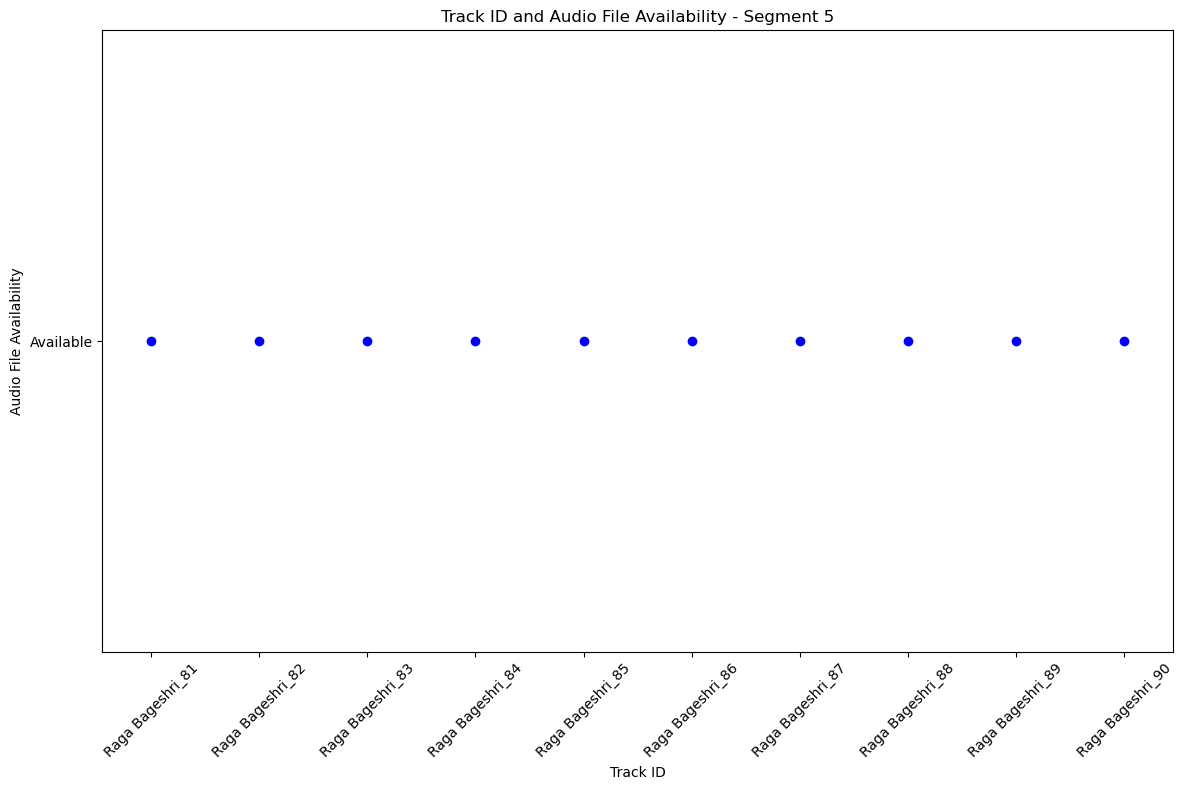

In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV data into a DataFrame
cleaned_csv_filename = 'cleaned_Raga_Bhairavi_tracks.csv'
df = pd.read_csv(cleaned_csv_filename)

# Check DataFrame info
print("DataFrame Info:")
print(df.info())



# Visualization 2: Count of Tracks by Artists
plt.figure(figsize=(12, 8))
artist_counts = df['raga_artist'].value_counts().sort_values(ascending=False)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Count of Tracks by Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Verify and Visualize Audio File Availability
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)

# Visualization 3: Optional - Visualize Audio File Availability
if missing_audio_indices:
    print("\nMissing audio files visualization:")
    missing_df = df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['raga_artist'].value_counts().values, y=missing_df['raga_artist'].value_counts().index, palette='rocket')
    plt.title('Missing Audio Files by Artist')
    plt.xlabel('Number of Missing Files')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Additional Visualizations: Customize based on specific insights or patterns

def check_audio_files(df):
    audio_status = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if os.path.exists(audio_path):
            audio_status.append('Available')
        else:
            audio_status.append('Not Available')
    return audio_status

# Add audio_status column to DataFrame
df['audio_status'] = check_audio_files(df)

# Divide into segments of 20 entries each for visualization
num_segments = (len(df) // 20) + 1

for i in range(num_segments):
    start_idx = i * 20
    end_idx = min((i + 1) * 20, len(df))
    
    # Subset of DataFrame for current segment
    df_segment = df.iloc[start_idx:end_idx]
    
    # Visualization: Track ID and Audio File Availability
    plt.figure(figsize=(12, 8))
    plt.scatter(df_segment['raga_id'], df_segment['audio_status'], color='blue', marker='o')
    plt.title(f'Track ID and Audio File Availability - Segment {i+1}')
    plt.xlabel('Track ID')
    plt.ylabel('Audio File Availability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [50]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import pandas as pd
import datetime

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def extract_track_info(track, raga_name, index):
    duration_ms = track['duration_ms']
    duration = str(datetime.timedelta(milliseconds=duration_ms))
    
    # Construct raga_id as raga_name_index
    raga_id = f"{raga_name}_{index}"
    
    track_info = {
        'raga_id': raga_id,
        'raga_name': track['name'],
        'raga_artist': track['artists'][0]['name'],
        'raga_duration': duration,  # Format duration as hh:mm:ss
        'raga_audio_track': track['preview_url'],  # Preview URL for the track
        'raga_effect': None  # Placeholder for raga effect
    }
    return track_info

def download_track_audio(track_info):
    track_id = track_info['raga_id']
    track_name = track_info['raga_name']
    artist_name = track_info['raga_artist']

    audio_url = track_info['raga_audio_track']
    if audio_url:
        # Create directory to save audio files if it doesn't exist
        directory = f"audio/{artist_name}"
        audio_filename = f"{track_name}_{artist_name}.mp3"  # Initialize audio_filename here

        try:
            os.makedirs(directory, exist_ok=True)

            # Download the audio file
            audio_path = os.path.join(directory, audio_filename)
            with open(audio_path, 'wb') as f:
                f.write(requests.get(audio_url).content)
            print(f"Downloaded: {audio_filename}")
            return audio_path  # Return the path if download is successful
        except Exception as e:
            print(f"Error downloading {audio_filename}: {str(e)}")
            return None  # Return None if download fails
    else:
        print(f"No preview URL available for track: {track_name} by {artist_name}. Skipping...")
        return None  # Return None if no preview URL

def search_and_extract_raga_tracks(sp, raga_name, max_entries=90):
    limit = 50
    offset = 0
    all_tracks = []
    index = 1  # Initialize index for raga_id

    while len(all_tracks) < max_entries:
        results = sp.search(q=raga_name, type='track', limit=limit, offset=offset)['tracks']['items']
        if not results:
            break
        for track in results:
            # Check if the track's name exactly matches the specified raga_name
            if raga_name.lower() in track['name'].lower():
                track_info = extract_track_info(track, raga_name, index)
                audio_path = download_track_audio(track_info)
                if audio_path:
                    track_info['raga_audio_path'] = audio_path  # Add audio path to track_info
                    all_tracks.append(track_info)
                    index += 1  # Increment index after processing a track
                if len(all_tracks) >= max_entries:
                    break
        offset += limit

    return pd.DataFrame(all_tracks)

# Example usage for Raga Basant
raga_name = "Raga Basant"
raga_tracks_df = search_and_extract_raga_tracks(sp, raga_name, max_entries=90)

# Remove entries with missing audio files (if any)
raga_tracks_df.dropna(subset=['raga_audio_path'], inplace=True)

# Save to CSV
csv_filename = f'{raga_name}_tracks.csv'
raga_tracks_df.to_csv(csv_filename, index=False)

# Display the DataFrame
print(raga_tracks_df.head())
print(f"Saved track information to {csv_filename}")


Downloaded: Raga Basant Bahar - Raga Basant Bahar - Ektaal - Teentaal_Kishori Amonkar.mp3
Downloaded: Raga Basant Bahar_Rashid Khan.mp3
Downloaded: Raga Basant - Piya Sang Kheloon_Rashid Khan.mp3
Downloaded: Raga Basant (1997)_Bhimsen Joshi.mp3
Downloaded: Raga Basant_Shivkumar Sharma.mp3
Downloaded: Raga Basant_Meeta Pandit.mp3
Downloaded: Raga Basant_Four Shillings Short.mp3
Downloaded: Raga Basant - Gat in Madhyalaya Teen Taal_Vishwa Mohan Bhatt.mp3
Downloaded: Raga Basant Bahar_Kishori Amonkar.mp3
Downloaded: Raga Basant - Tala Teentaal_Shivkumar Sharma.mp3
Downloaded: Raga Basant: Alap_Veena Sahasrabuddhe.mp3
Downloaded: Raga Basant_Shanti Sharma.mp3
Downloaded: Raga Basant Mukhari - live_Kartik Seshadri.mp3
Downloaded: Awakening - Raga Basant Mukhari_Manish Vyas.mp3
Downloaded: Raga Basant (Khayal Madhyalaya In Teentala)_Bhimsen Joshi w. Tulsidas Borkar, Shashikant Muley, Rajendra Rathod, Narayan Des.mp3
Downloaded: Khayal`- Raga Basant Bahar - Ektaal_Chhannulal Mishra.mp3
Downlo

In [51]:
import pandas as pd
import os

# Load CSV file into a DataFrame
csv_filename = 'Raga Basant_tracks.csv'
df = pd.read_csv(csv_filename)

# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in DataFrame:")
print(missing_values)

# Step 3: Check for duplicate entries based on raga_id
duplicate_entries = df[df.duplicated(subset=['raga_id'], keep=False)]
if not duplicate_entries.empty:
    print("\nDuplicate entries based on raga_id:")
    print(duplicate_entries)
else:
    print("\nNo duplicate entries found based on raga_id.")

# Step 4: Verify existence of audio files
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)
if missing_audio_indices:
    print("\nMissing audio files:")
    print(df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']])
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Step 5: Handle any other inconsistencies or errors based on specific requirements

# Optionally, you can save the cleaned DataFrame back to CSV
cleaned_csv_filename = 'Raga Basant_tracks.csv'
df.to_csv(cleaned_csv_filename, index=False)
print(f"\nCleaned track information saved to {cleaned_csv_filename}")


Missing values in DataFrame:
raga_id              0
raga_name            0
raga_artist          0
raga_duration        0
raga_audio_track     0
raga_effect         90
raga_audio_path      0
dtype: int64

No duplicate entries found based on raga_id.

All audio files referenced in the DataFrame exist.

Cleaned track information saved to Raga Basant_tracks.csv


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   raga_id           90 non-null     object 
 1   raga_name         90 non-null     object 
 2   raga_artist       90 non-null     object 
 3   raga_duration     90 non-null     object 
 4   raga_audio_track  90 non-null     object 
 5   raga_effect       0 non-null      float64
 6   raga_audio_path   90 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.1+ KB
None


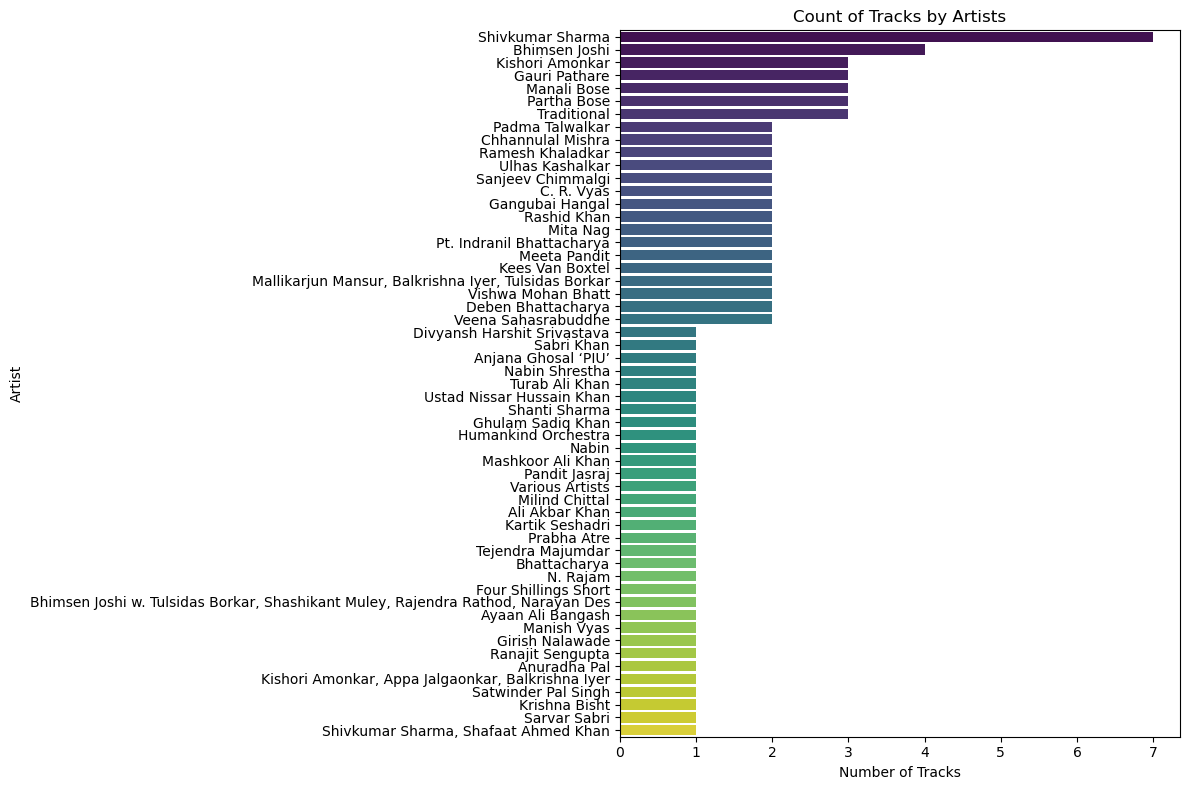


All audio files referenced in the DataFrame exist.


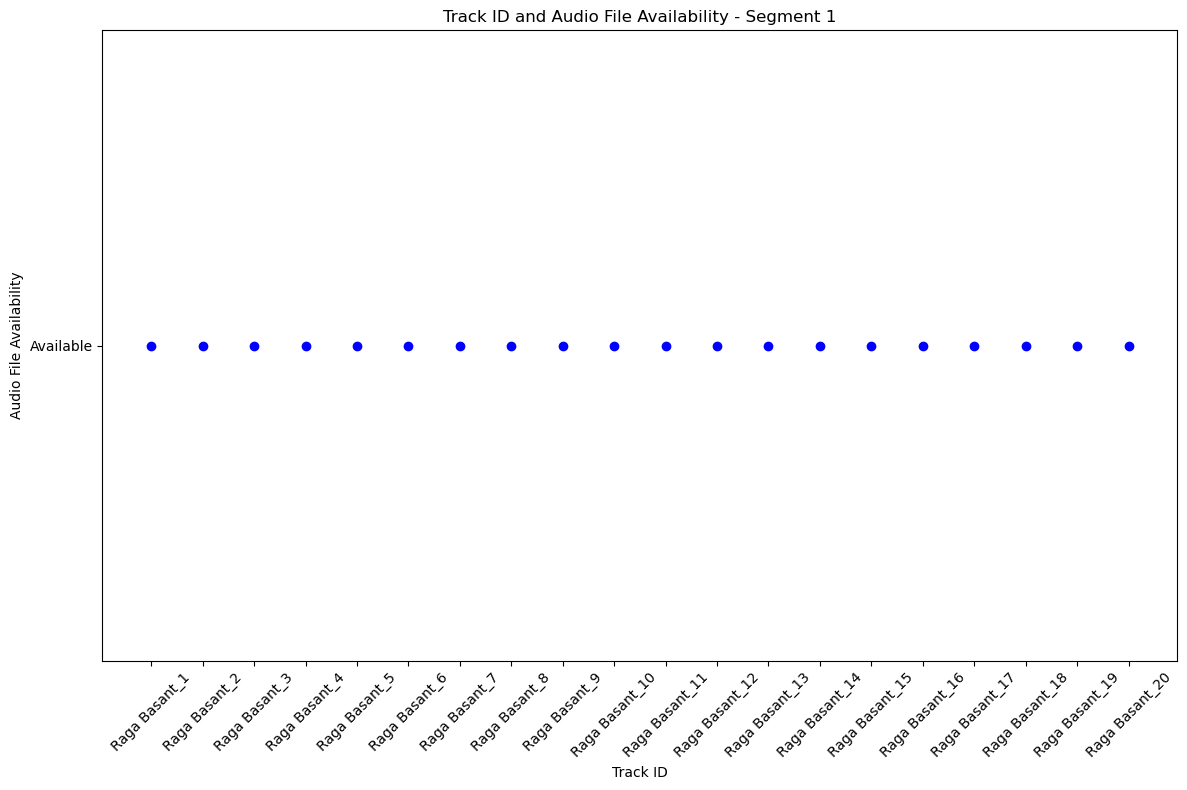

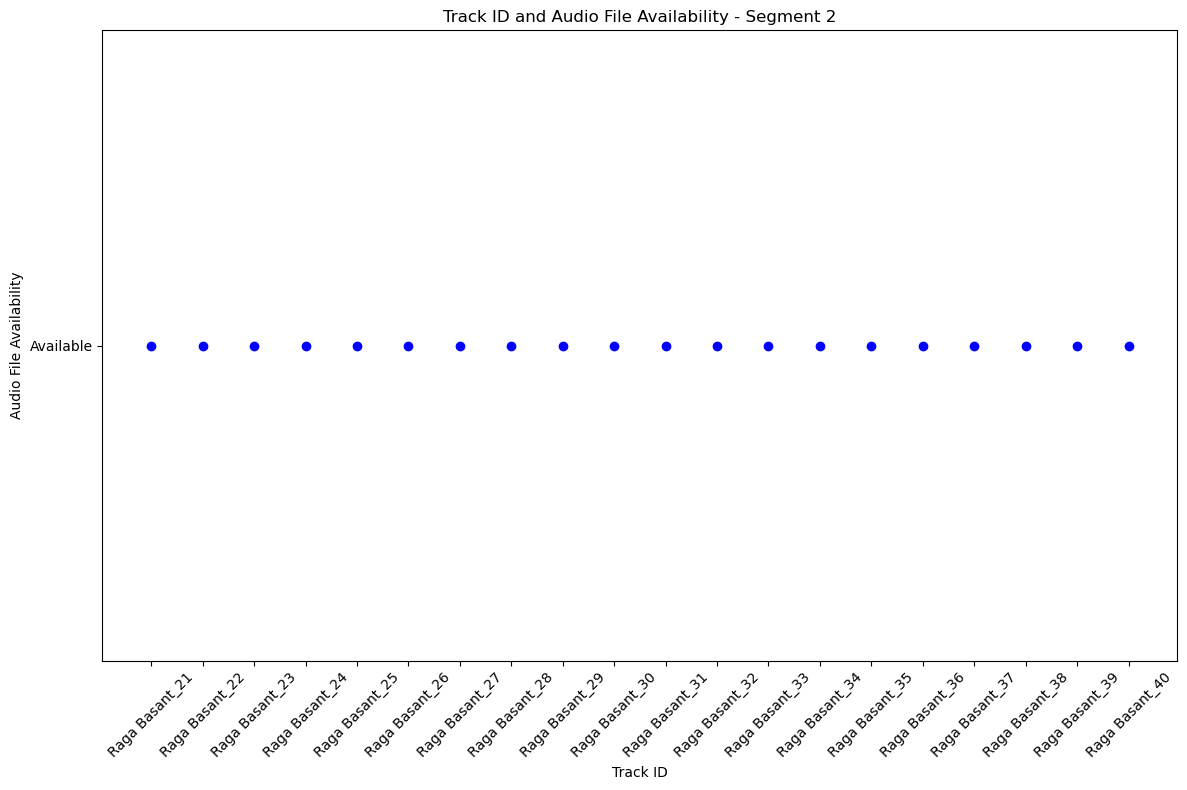

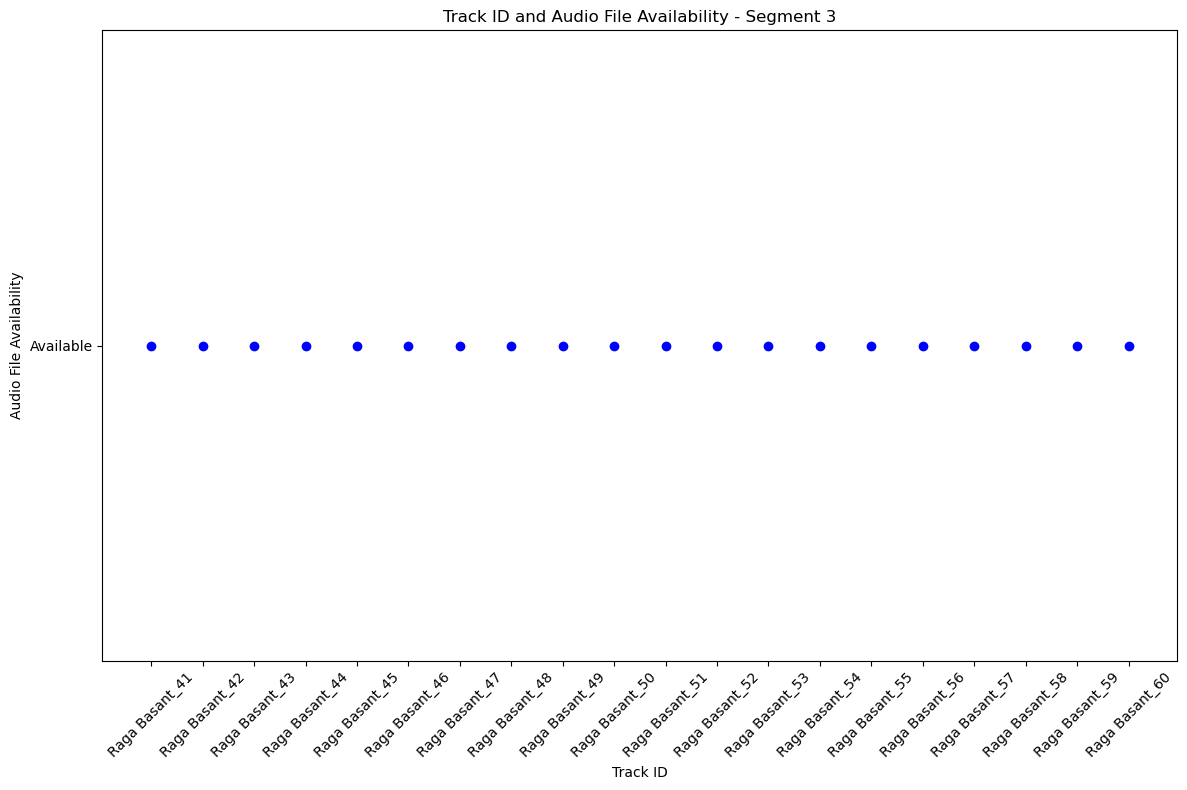

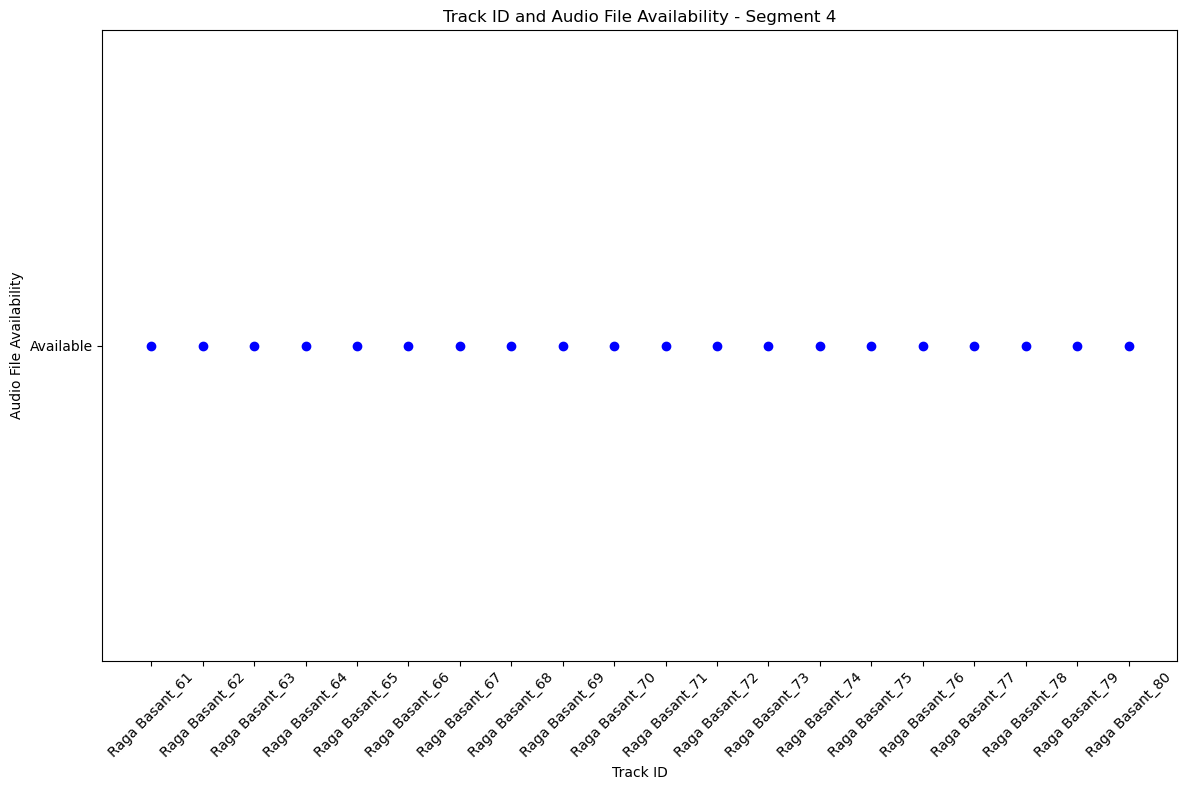

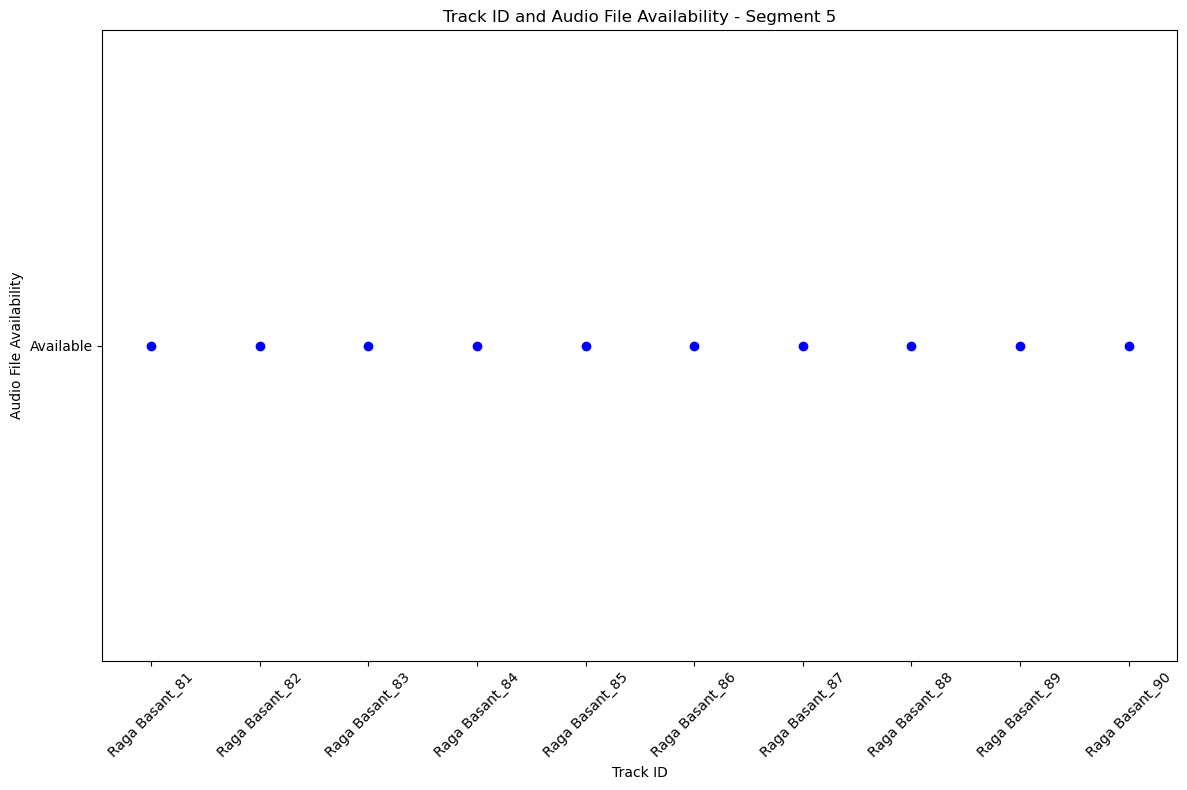

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV data into a DataFrame
cleaned_csv_filename = 'Raga Basant_tracks.csv'
df = pd.read_csv(cleaned_csv_filename)

# Check DataFrame info
print("DataFrame Info:")
print(df.info())



# Visualization 2: Count of Tracks by Artists
plt.figure(figsize=(12, 8))
artist_counts = df['raga_artist'].value_counts().sort_values(ascending=False)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Count of Tracks by Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Verify and Visualize Audio File Availability
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)

# Visualization 3: Optional - Visualize Audio File Availability
if missing_audio_indices:
    print("\nMissing audio files visualization:")
    missing_df = df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['raga_artist'].value_counts().values, y=missing_df['raga_artist'].value_counts().index, palette='rocket')
    plt.title('Missing Audio Files by Artist')
    plt.xlabel('Number of Missing Files')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Additional Visualizations: Customize based on specific insights or patterns

def check_audio_files(df):
    audio_status = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if os.path.exists(audio_path):
            audio_status.append('Available')
        else:
            audio_status.append('Not Available')
    return audio_status

# Add audio_status column to DataFrame
df['audio_status'] = check_audio_files(df)

# Divide into segments of 20 entries each for visualization
num_segments = (len(df) // 20) + 1

for i in range(num_segments):
    start_idx = i * 20
    end_idx = min((i + 1) * 20, len(df))
    
    # Subset of DataFrame for current segment
    df_segment = df.iloc[start_idx:end_idx]
    
    # Visualization: Track ID and Audio File Availability
    plt.figure(figsize=(12, 8))
    plt.scatter(df_segment['raga_id'], df_segment['audio_status'], color='blue', marker='o')
    plt.title(f'Track ID and Audio File Availability - Segment {i+1}')
    plt.xlabel('Track ID')
    plt.ylabel('Audio File Availability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [27]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import requests
import pandas as pd
import datetime

client_id = '883d8de3b4fb48e9ab32028467324d90'
client_secret = 'eaa763e8e03742a89e3f0f7f68a25ca1'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def extract_track_info(track, raga_name, index):
    duration_ms = track['duration_ms']
    duration = str(datetime.timedelta(milliseconds=duration_ms))
    
    # Construct raga_id as raga_name_index
    raga_id = f"{raga_name}_{index}"
    
    track_info = {
        'raga_id': raga_id,
        'raga_name': track['name'],
        'raga_artist': track['artists'][0]['name'],
        'raga_duration': duration,  # Format duration as hh:mm:ss
        'raga_audio_track': track['preview_url'],  # Preview URL for the track
        'raga_effect': None  # Placeholder for raga effect
    }
    return track_info

def download_track_audio(track_info):
    track_id = track_info['raga_id']
    track_name = track_info['raga_name']
    artist_name = track_info['raga_artist']

    audio_url = track_info['raga_audio_track']
    if audio_url:
        # Create directory to save audio files if it doesn't exist
        directory = f"audio/{artist_name}"
        audio_filename = f"{track_name}_{artist_name}.mp3"  # Initialize audio_filename here

        try:
            os.makedirs(directory, exist_ok=True)

            # Download the audio file
            audio_path = os.path.join(directory, audio_filename)
            with open(audio_path, 'wb') as f:
                response = requests.get(audio_url)
                if response.status_code == 200:
                    f.write(response.content)
                    print(f"Downloaded: {audio_filename}")
                    return True  # Successfully downloaded
                else:
                    print(f"Failed to download {audio_filename}. Status code: {response.status_code}")
                    return False  # Failed to download
        except Exception as e:
            print(f"Error downloading {audio_filename}: {str(e)}")
            return False  # Failed due to exception
    else:
        print(f"No preview URL available for track: {track_name} by {artist_name}. Skipping...")
        return False  # No preview URL available

def search_and_extract_raga_tracks(sp, raga_name, max_entries=90):
    limit = 50
    offset = 0
    all_tracks = []
    index = 1  # Initialize index for raga_id

    while len(all_tracks) < max_entries:
        results = sp.search(q=raga_name, type='track', limit=limit, offset=offset)['tracks']['items']
        if not results:
            break
        for track in results:
            # Check if the track's name exactly matches the raga_name (case-insensitive)
            if raga_name.lower() in track['name'].lower():
                track_info = extract_track_info(track, raga_name, index)
                if download_track_audio(track_info):
                    all_tracks.append(track_info)
                    index += 1  # Increment index after processing a track
                if len(all_tracks) >= max_entries:
                    break
        offset += limit

    return pd.DataFrame(all_tracks)

# Example usage for Raga Bhairavi
raga_name = "Raga Bhairavi"
raga_tracks_df = search_and_extract_raga_tracks(sp, raga_name, max_entries=90)

# Save to CSV
csv_filename = f'{raga_name}_tracks.csv'
raga_tracks_df.to_csv(csv_filename, index=False)

# Display the DataFrame
print(raga_tracks_df.head())
print(f"Saved track information to {csv_filename}")


Downloaded: Raga Bhairavi_Shaant Man.mp3
Downloaded: Raga Bhairavi_Sangit Om.mp3
Downloaded: Dhun In Raga Bhairavi_Anuradha Pal.mp3
Downloaded: Raga Bhairavi Malhar_Saraswati Sangeet.mp3
Downloaded: Raga Bhairavi Marwa_Saraswati Sangeet.mp3
Downloaded: Raga Bhairavi Hem_Saraswati Sangeet.mp3
Downloaded: Raga Bhairavi Bahar_Saraswati Sangeet.mp3
Downloaded: Raga Bhairavi Drut_Shahid Parvez.mp3
Downloaded: Raga Bhairavi_Manish Vyas.mp3
Downloaded: Raga Bhairavi Dhun Punjabi Keharva_Niladri Kumar.mp3
Downloaded: Bhajan de Mira : Raga bhairavi_Lakshmi Shankar.mp3
No preview URL available for track: Raga Bhairavi by Ali Akbar Khan. Skipping...
Downloaded: Raga Bhairavi_Amjad Ali Khan.mp3
Downloaded: Raga Bhairavi - Thumri - Teentaal_Hariprasad Chaurasia.mp3
Downloaded: Raga Bhairavi Alap_Shahid Parvez.mp3
Error downloading Raga Bhairavi / Raagam-Taanam_T. N. Krishnan.mp3: [Errno 2] No such file or directory: 'audio/T. N. Krishnan\\Raga Bhairavi / Raagam-Taanam_T. N. Krishnan.mp3'
Downloaded

In [29]:
import pandas as pd
import os

# Load CSV file into a DataFrame
csv_filename = 'Raga Bhairavi_tracks.csv'
df = pd.read_csv(csv_filename)

# Step 2: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in DataFrame:")
print(missing_values)

# Step 3: Check for duplicate entries based on raga_id
duplicate_entries = df[df.duplicated(subset=['raga_id'], keep=False)]
if not duplicate_entries.empty:
    print("\nDuplicate entries based on raga_id:")
    print(duplicate_entries)
else:
    print("\nNo duplicate entries found based on raga_id.")

# Step 4: Verify existence of audio files
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)
if missing_audio_indices:
    print("\nMissing audio files:")
    print(df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']])
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Step 5: Handle any other inconsistencies or errors based on specific requirements

# Optionally, you can save the cleaned DataFrame back to CSV
cleaned_csv_filename = 'cleaned_Raga_Bhairavi_tracks.csv'
df.to_csv(cleaned_csv_filename, index=False)
print(f"\nCleaned track information saved to {cleaned_csv_filename}")


Missing values in DataFrame:
raga_id              0
raga_name            0
raga_artist          0
raga_duration        0
raga_audio_track     0
raga_effect         90
dtype: int64

No duplicate entries found based on raga_id.

All audio files referenced in the DataFrame exist.

Cleaned track information saved to cleaned_Raga_Bhairavi_tracks.csv


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   raga_id           90 non-null     object 
 1   raga_name         90 non-null     object 
 2   raga_artist       90 non-null     object 
 3   raga_duration     90 non-null     object 
 4   raga_audio_track  90 non-null     object 
 5   raga_effect       0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 4.3+ KB
None


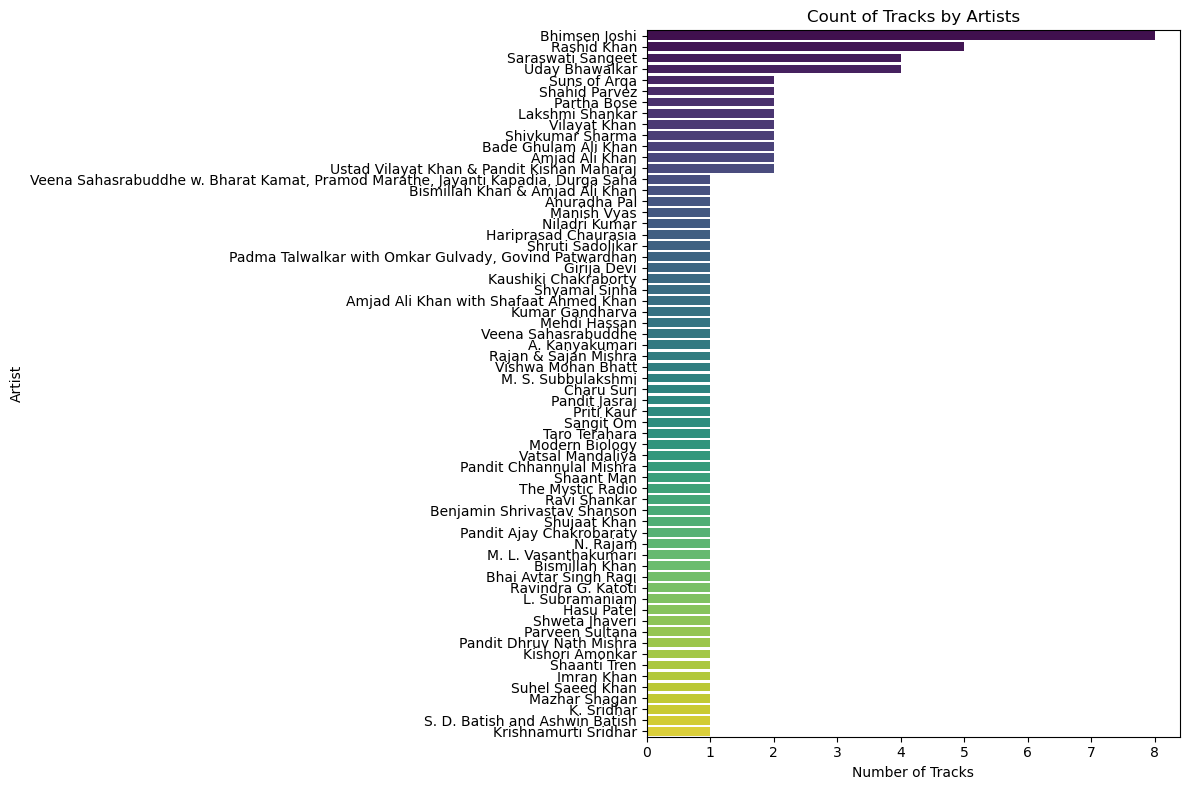


All audio files referenced in the DataFrame exist.


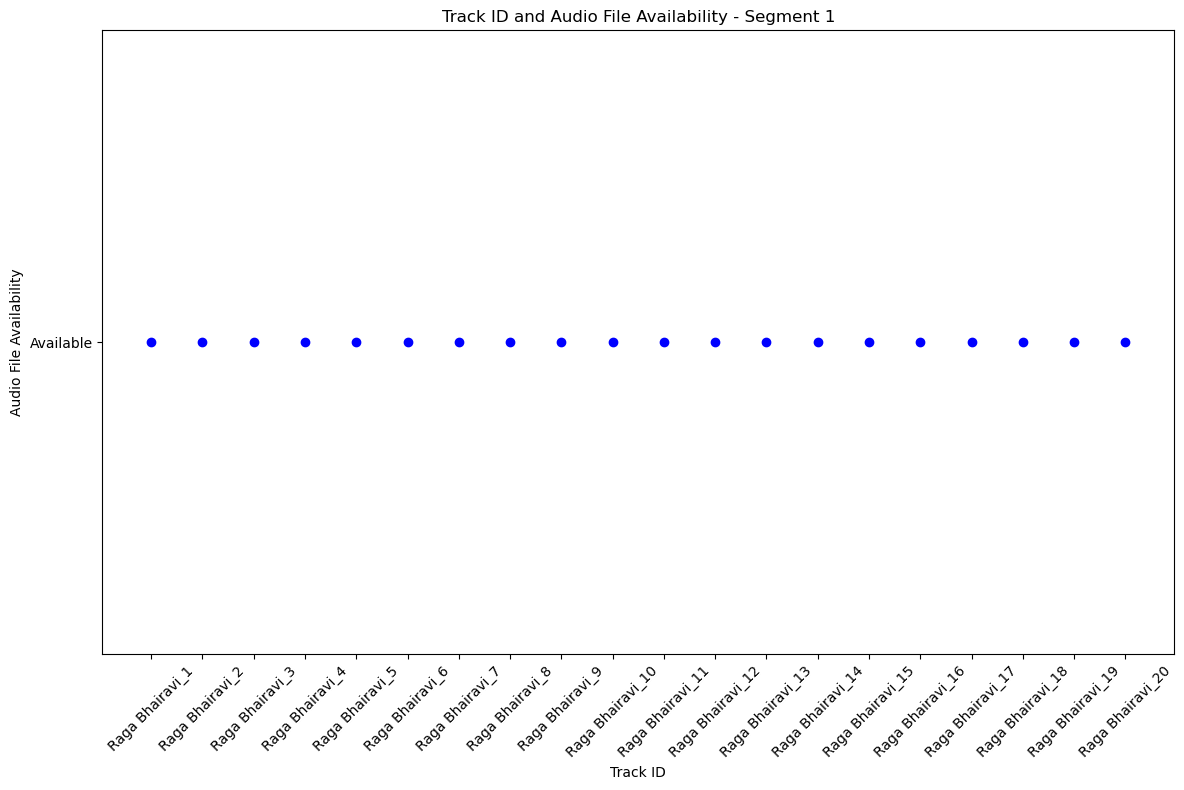

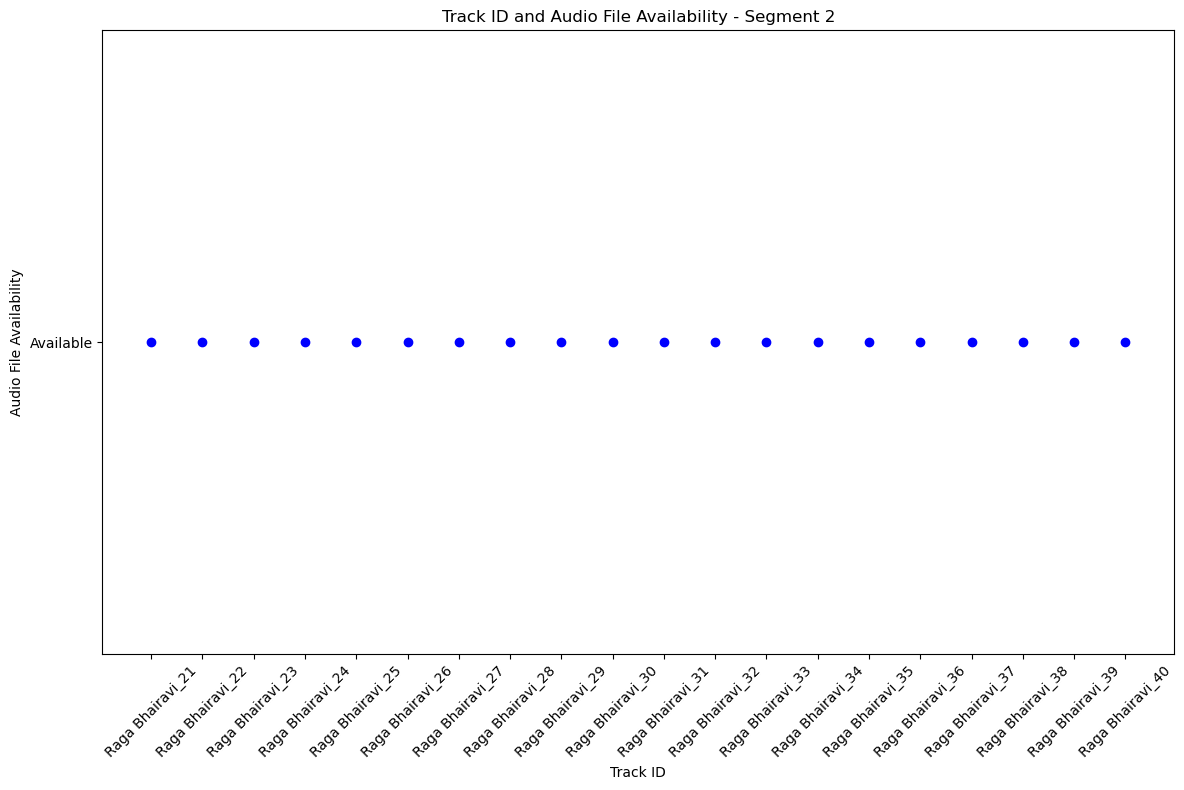

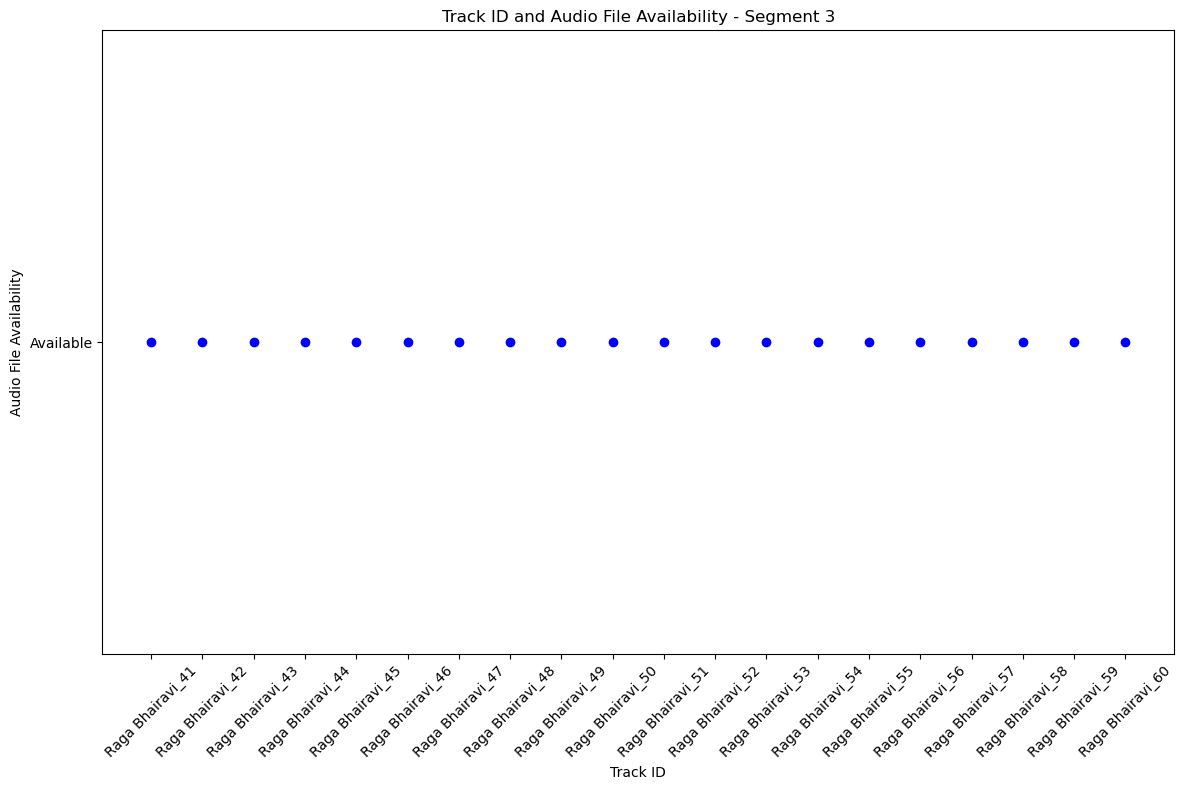

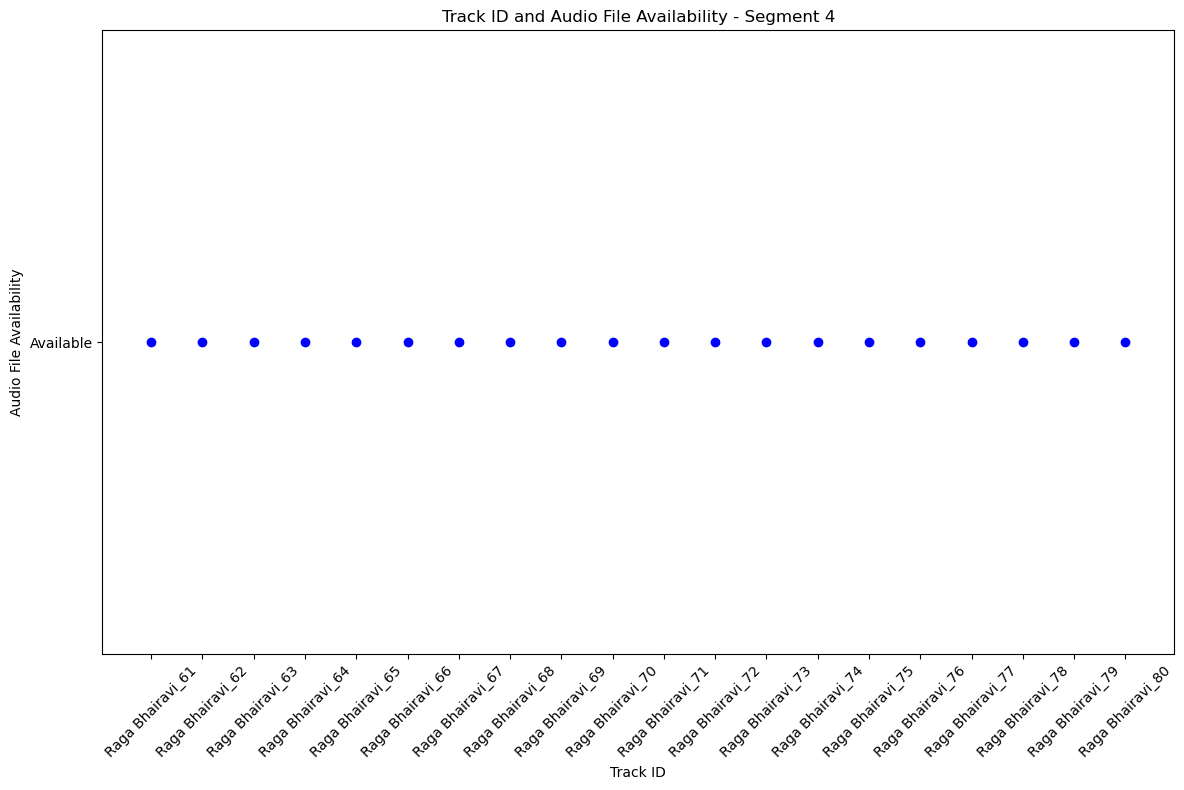

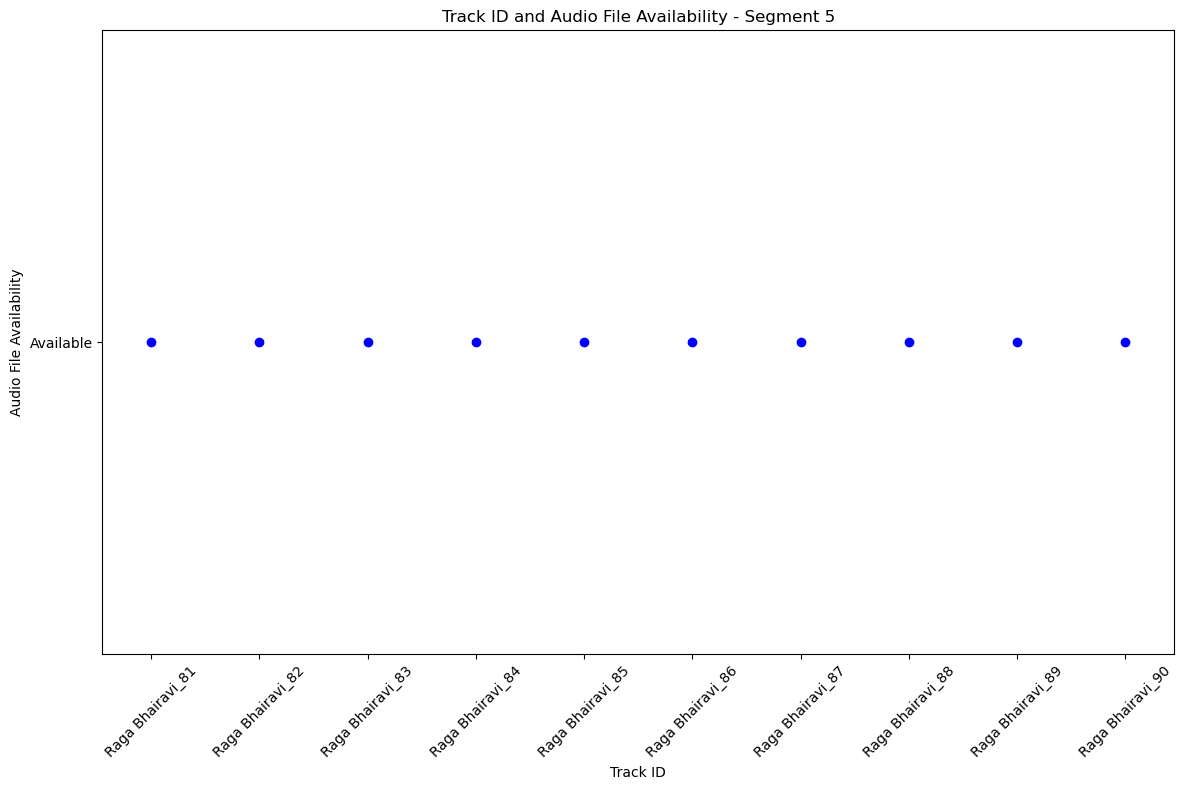

In [33]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV data into a DataFrame
cleaned_csv_filename = 'cleaned_Raga_Bhairavi_tracks.csv'
df = pd.read_csv(cleaned_csv_filename)

# Check DataFrame info
print("DataFrame Info:")
print(df.info())



# Visualization 2: Count of Tracks by Artists
plt.figure(figsize=(12, 8))
artist_counts = df['raga_artist'].value_counts().sort_values(ascending=False)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Count of Tracks by Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Verify and Visualize Audio File Availability
def check_audio_files(df):
    missing_audio_files = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if not os.path.exists(audio_path):
            missing_audio_files.append(index)
    return missing_audio_files

missing_audio_indices = check_audio_files(df)

# Visualization 3: Optional - Visualize Audio File Availability
if missing_audio_indices:
    print("\nMissing audio files visualization:")
    missing_df = df.loc[missing_audio_indices, ['raga_id', 'raga_name', 'raga_artist']]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['raga_artist'].value_counts().values, y=missing_df['raga_artist'].value_counts().index, palette='rocket')
    plt.title('Missing Audio Files by Artist')
    plt.xlabel('Number of Missing Files')
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()
else:
    print("\nAll audio files referenced in the DataFrame exist.")

# Additional Visualizations: Customize based on specific insights or patterns

def check_audio_files(df):
    audio_status = []
    for index, row in df.iterrows():
        audio_filename = f"{row['raga_name']}_{row['raga_artist']}.mp3"
        audio_path = f"audio/{row['raga_artist']}/{audio_filename}"
        if os.path.exists(audio_path):
            audio_status.append('Available')
        else:
            audio_status.append('Not Available')
    return audio_status

# Add audio_status column to DataFrame
df['audio_status'] = check_audio_files(df)

# Divide into segments of 20 entries each for visualization
num_segments = (len(df) // 20) + 1

for i in range(num_segments):
    start_idx = i * 20
    end_idx = min((i + 1) * 20, len(df))
    
    # Subset of DataFrame for current segment
    df_segment = df.iloc[start_idx:end_idx]
    
    # Visualization: Track ID and Audio File Availability
    plt.figure(figsize=(12, 8))
    plt.scatter(df_segment['raga_id'], df_segment['audio_status'], color='blue', marker='o')
    plt.title(f'Track ID and Audio File Availability - Segment {i+1}')
    plt.xlabel('Track ID')
    plt.ylabel('Audio File Availability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()